In [ ]:
#Abdul Bhutta
#Final Project for EE8108 Multimedia Processing and Communications - Fall 2023

#Dataset Link: https://universe.roboflow.com/uemc-y7rsy/emociones
#YOLOv5 Official Train Custom Dataset Tutorial: https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
#YOLOv5 Official Colab Notebook: https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb

# Import Libraries and install dependencies

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/yolov5


In [3]:
import torch
import glob

from PIL import Image
from IPython.display import Image, clear_output  
from roboflow import Roboflow
from IPython.display import Image, display

!pip install -qr requirements.txt  # install dependencies (ignore errors)

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets
from utils.plots import plot_results 

#Set the device to GPU or CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.1.1 CPU


In [3]:
#Set paths 
model_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5'

In [8]:
#access google drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Setup Roboflow and Download YOLOv5 Models

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16114, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16114 (delta 8), reused 10 (delta 1), pack-reused 16089
Receiving objects: 100% (16114/16114), 14.79 MiB | 17.27 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.
/content/yolov5


In [5]:
rf = Roboflow(api_key="qM0D0mlPVsJGkXxwQcWm")
project = rf.workspace("uemc-y7rsy").project("emociones")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Emociones-1 in yolov5pytorch:: 100%|██████████| 12602/12602 [00:03<00:00, 3650.52it/s]


In [6]:
%cd /content/yolov5

/content/yolov5


In [9]:
dataset.location = "/content/yolov5/Emociones-1"

names:
- anger
- contempt
- disgust
- fear
- happy
- sadness
- surprise
nc: 7
roboflow:
  license: Public Domain
  project: emociones
  url: https://universe.roboflow.com/uemc-y7rsy/emociones/dataset/1
  version: 1
  workspace: uemc-y7rsy
test: ../test/images
train: Emociones-1/train/images
val: Emociones-1/valid/images


In [10]:
#Get number of classes from data.yaml
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [11]:
#YOLOv5s Architecture
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

# Train the YOLOv5 
### DO NOT RUN THIS CODE OR THE MODEL PARAMETERS WILL BE OVERWRITTEN!

In [13]:
#Define the model and train
!python train.py --img 640 --batch 16 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --name yolov5s_results --workers 2 --cache

/content/yolov5
2023-12-26 13:57:48.728525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 13:57:48.728589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 13:57:48.730051: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Emociones-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=

In [ ]:
#Extract the folder for local use
!zip -r /content/file.zip /content/Folder_To_Zip

# Training Metrics

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

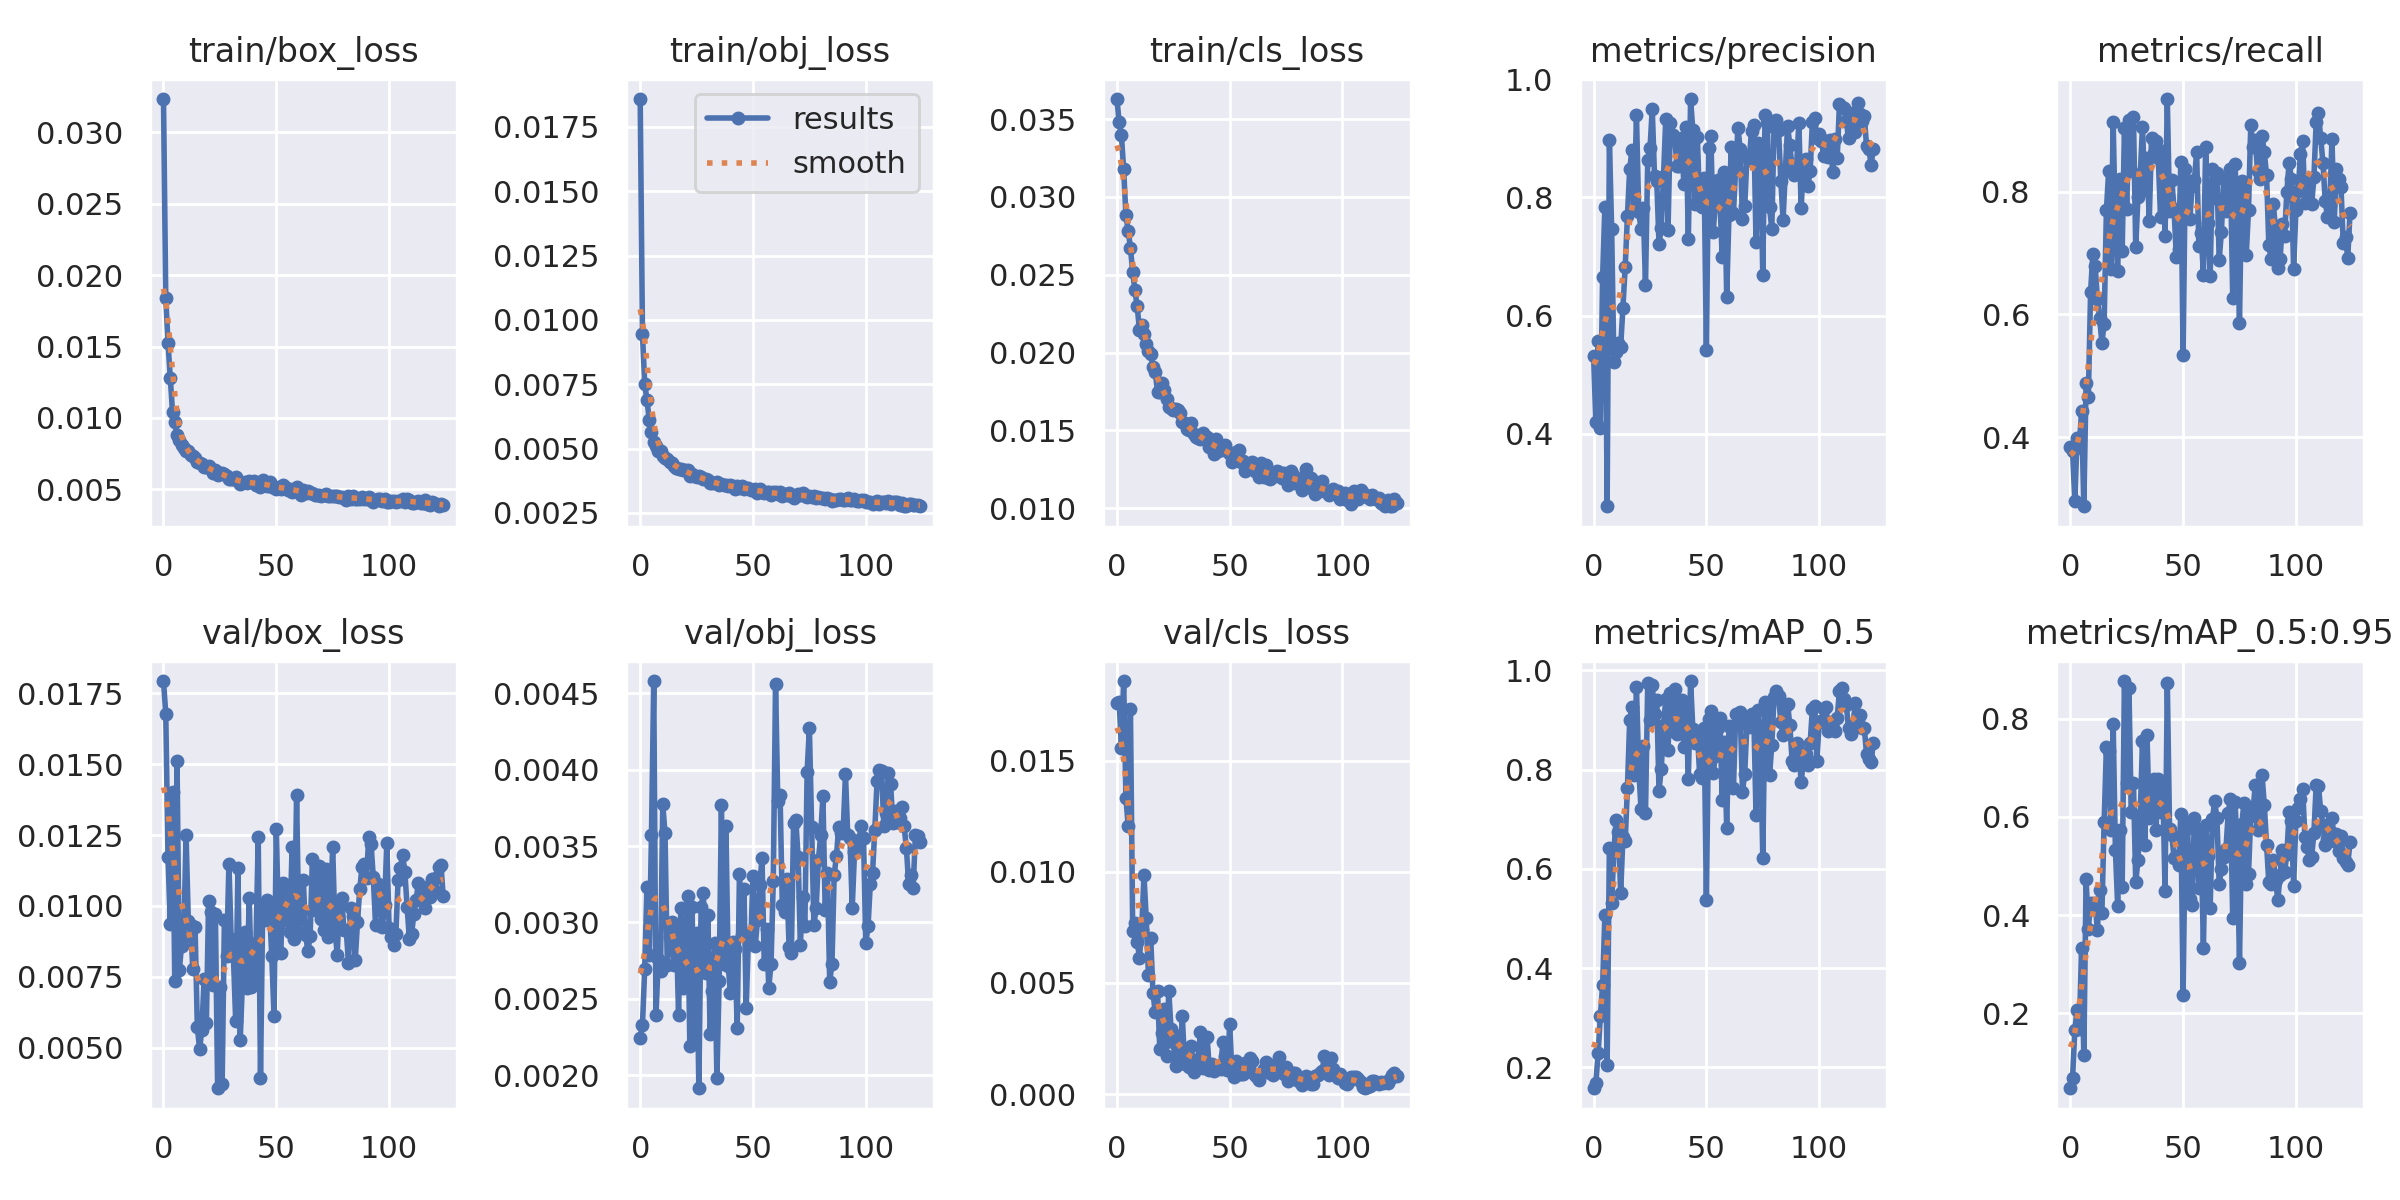

In [11]:
Image(filename=model_path + '/runs/train/yolov5s_results/results.png', width=1000)

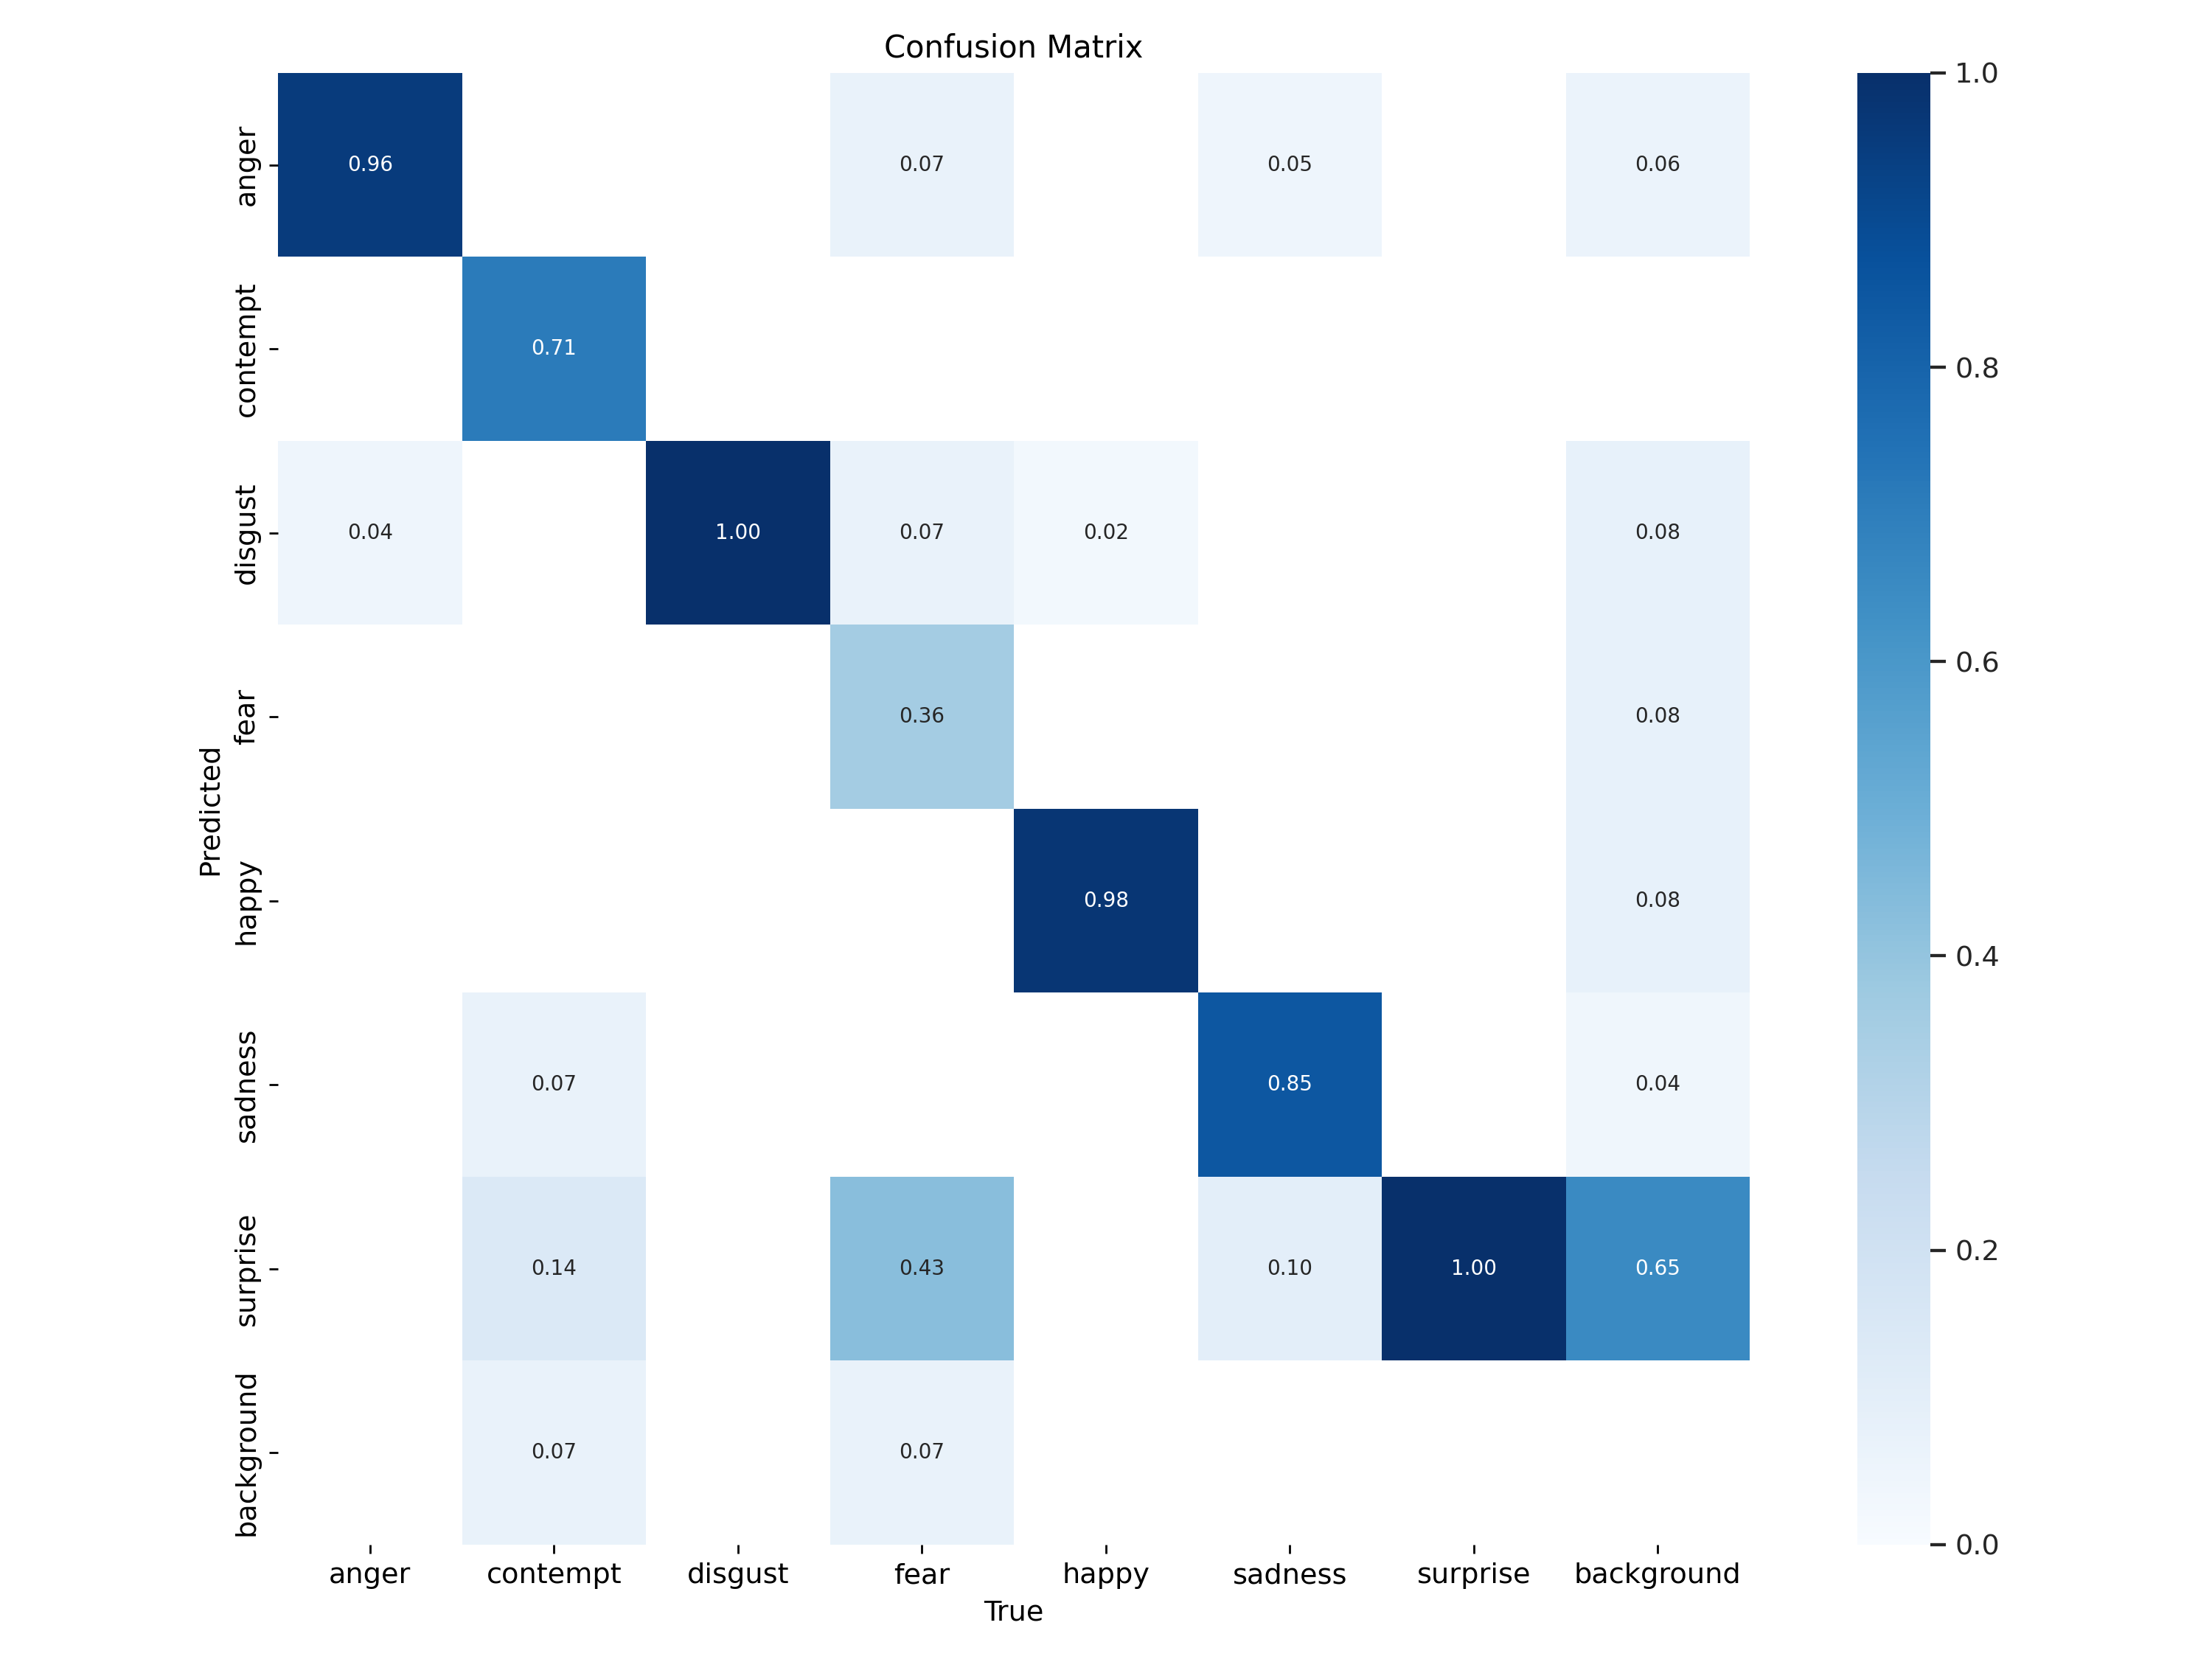

In [12]:
Image(filename=model_path + '/runs/train/yolov5s_results/confusion_matrix.png', width=1000)

# View the YOLOv5 Architecture

In [237]:
model_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5'
test_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images'

#/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/detect.py

In [13]:
#verify the model and view each layer of the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path + '/runs/train/yolov5s_results/weights/best.pt', force_reload=True)

model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/abdulbhutta/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [51]:
#Visualize the model architecture 

#Test image 
#image = {test_path} + '/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f.jpg'
image = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f.jpg'

!python {model_path}/detect.py --weights {model_path}/runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.60 --source {image} --visualize

detect: weights=['/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Saving runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a

# Backbone Layers 0 - 9

In [192]:
#display the images 
stage_0 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage0_Conv_features.png'
stage_1 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage1_Conv_features.png'
stage_2 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage2_C3_features.png'
stage_3 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage3_Conv_features.png'
stage_4 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage4_C3_features.png'
stage_5 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage5_Conv_features.png'
stage_6 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage6_C3_features.png'
stage_7 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage7_Conv_features.png'
stage_8 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage8_C3_features.png'
stage_9 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage9_SPPF_features.png'

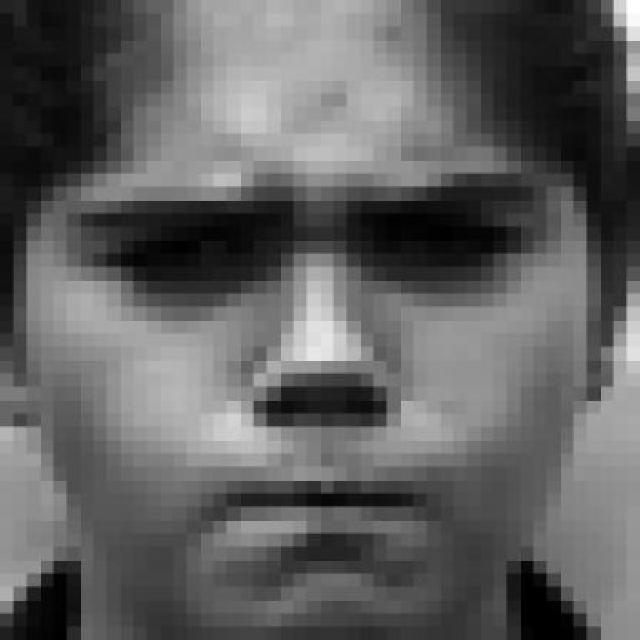

In [123]:
#Display the Original Image
Image(filename=image, width=300)

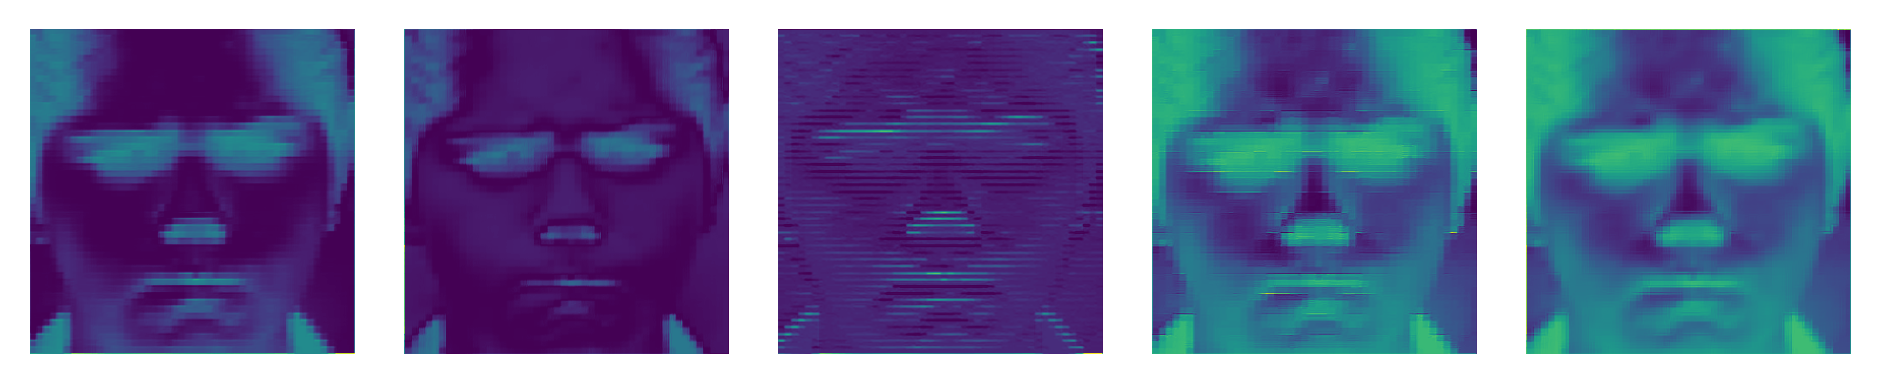

In [194]:
Image(filename=stage_0, width=1000)

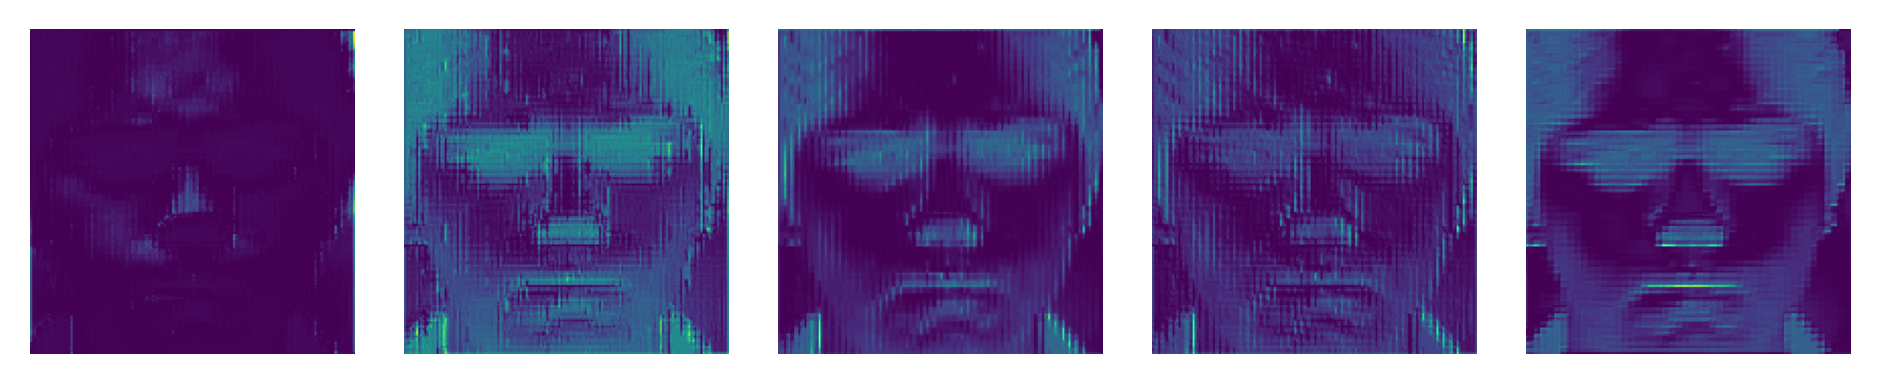

In [195]:
Image(filename=stage_1, width=1000)

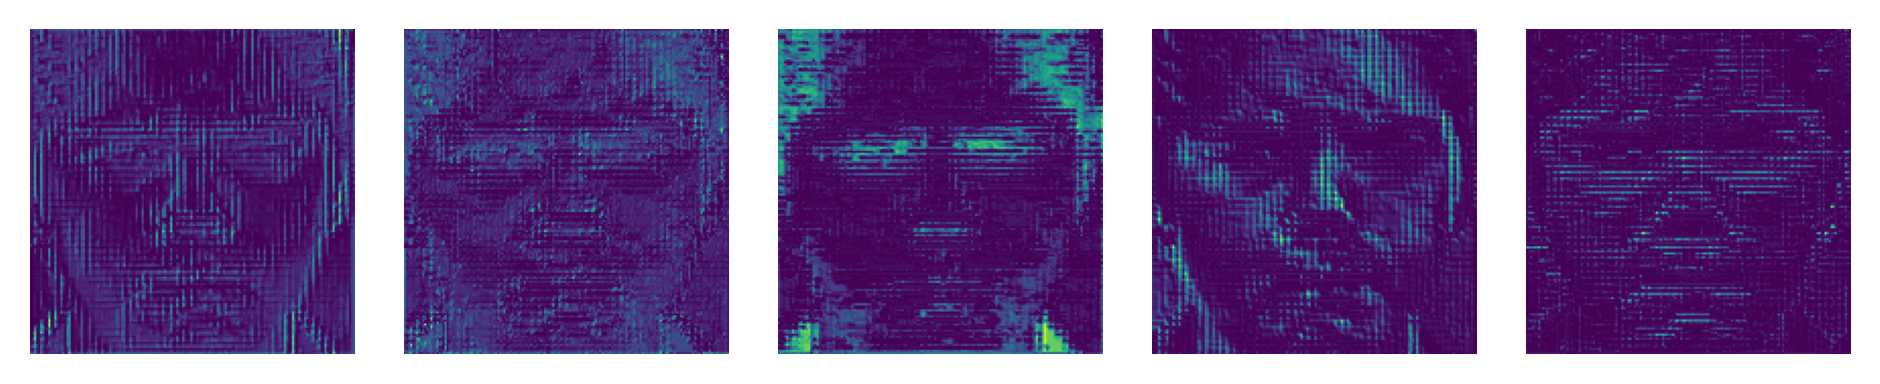

In [196]:
Image(filename=stage_2, width=1000)

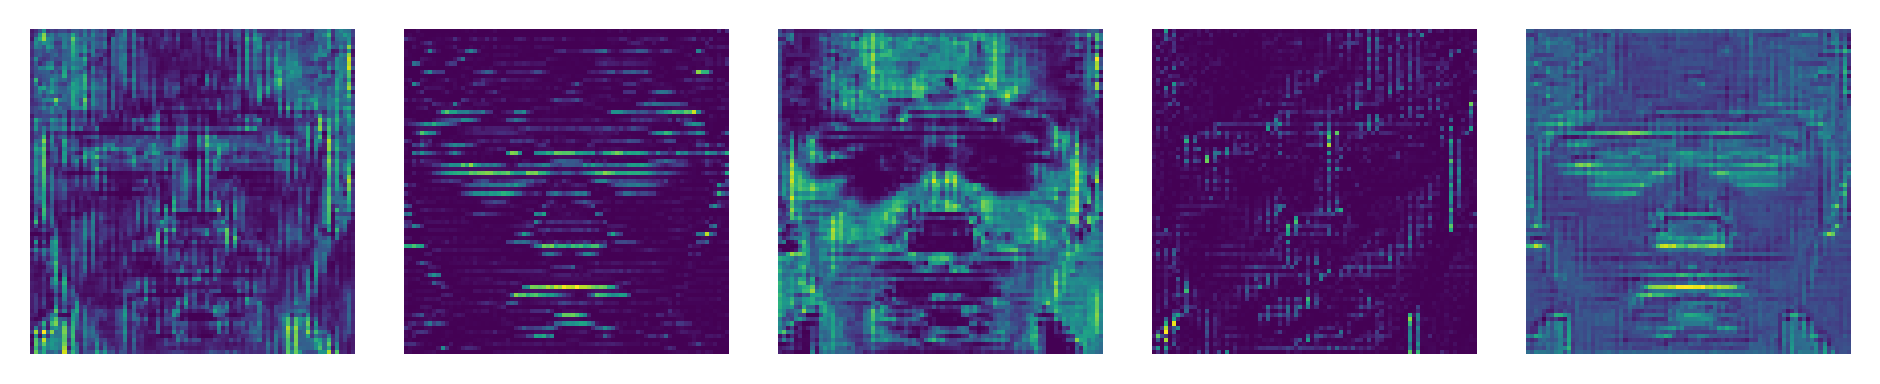

In [197]:
Image(filename=stage_3, width=1000)

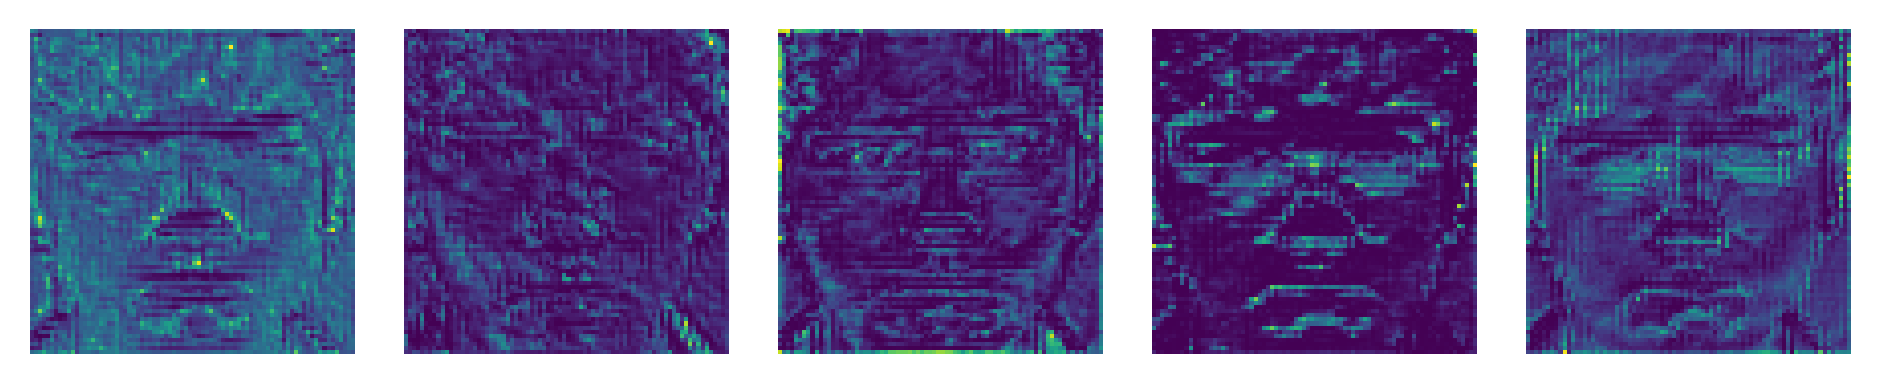

In [198]:
Image(filename=stage_4, width=1000)

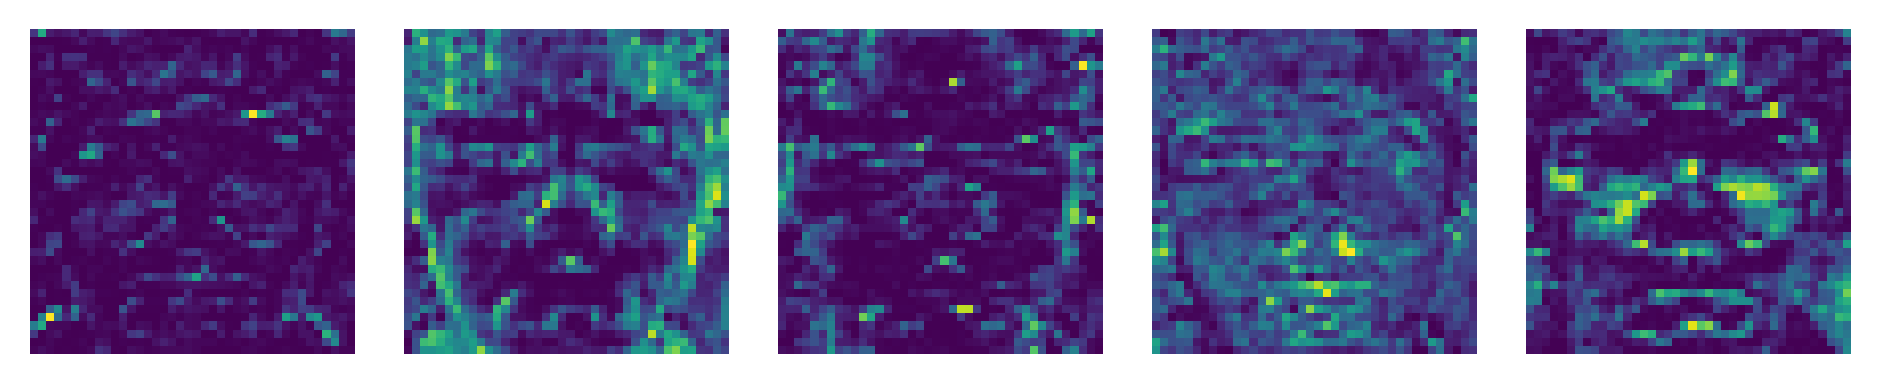

In [199]:
Image(filename=stage_5, width=1000)

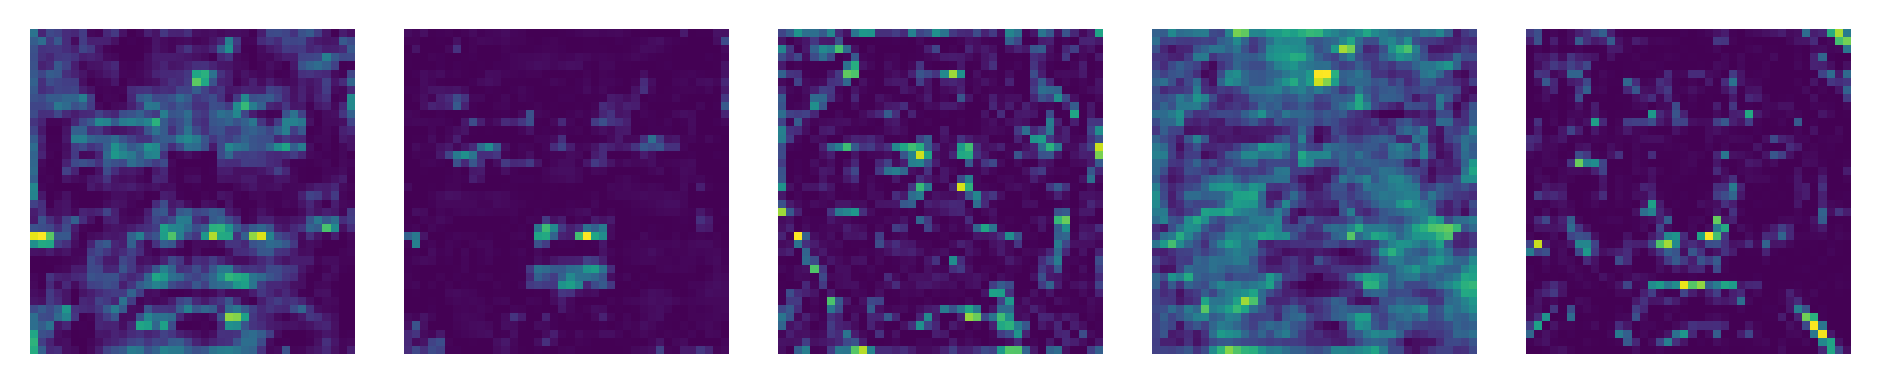

In [202]:
Image(filename=stage_6, width=1000)

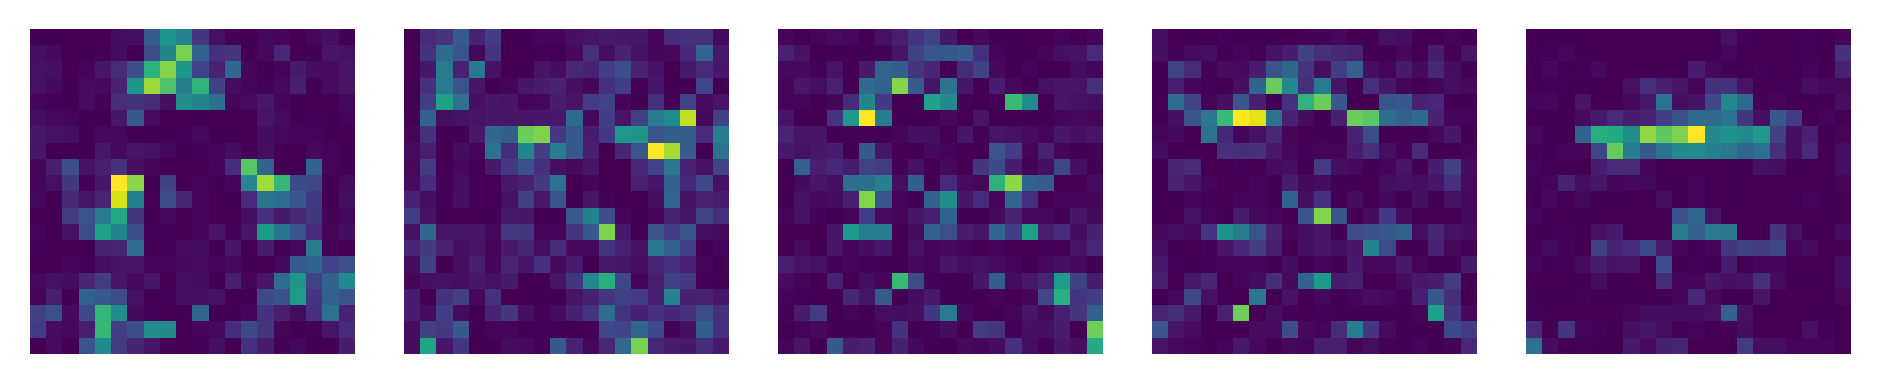

In [201]:
Image(filename=stage_7, width=1000)

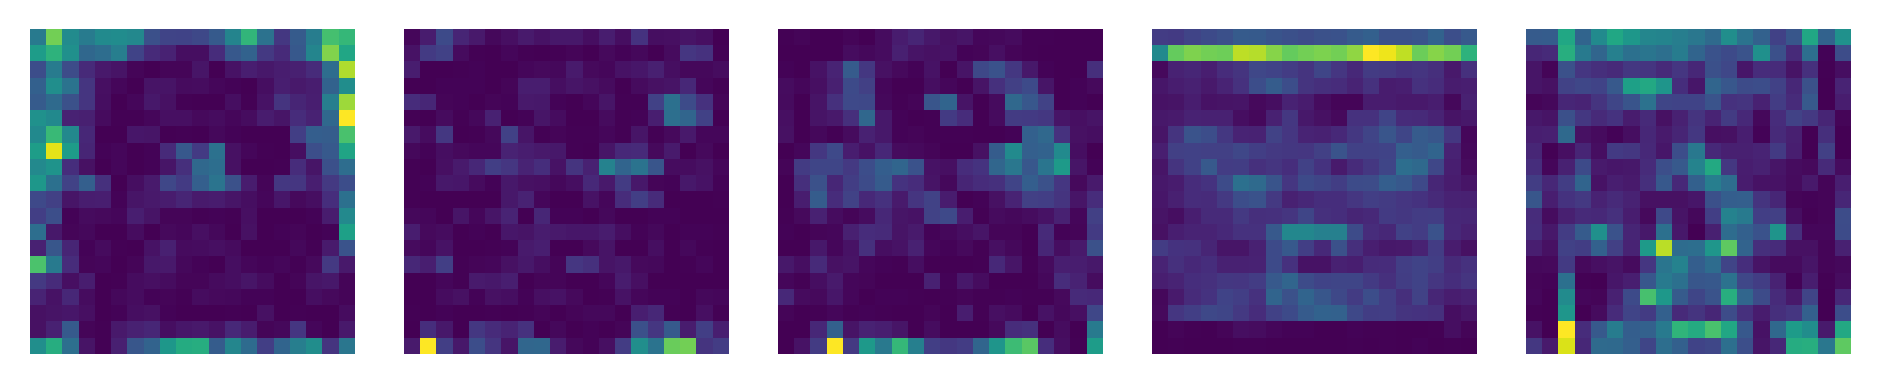

In [203]:
Image(filename=stage_8, width=1000)

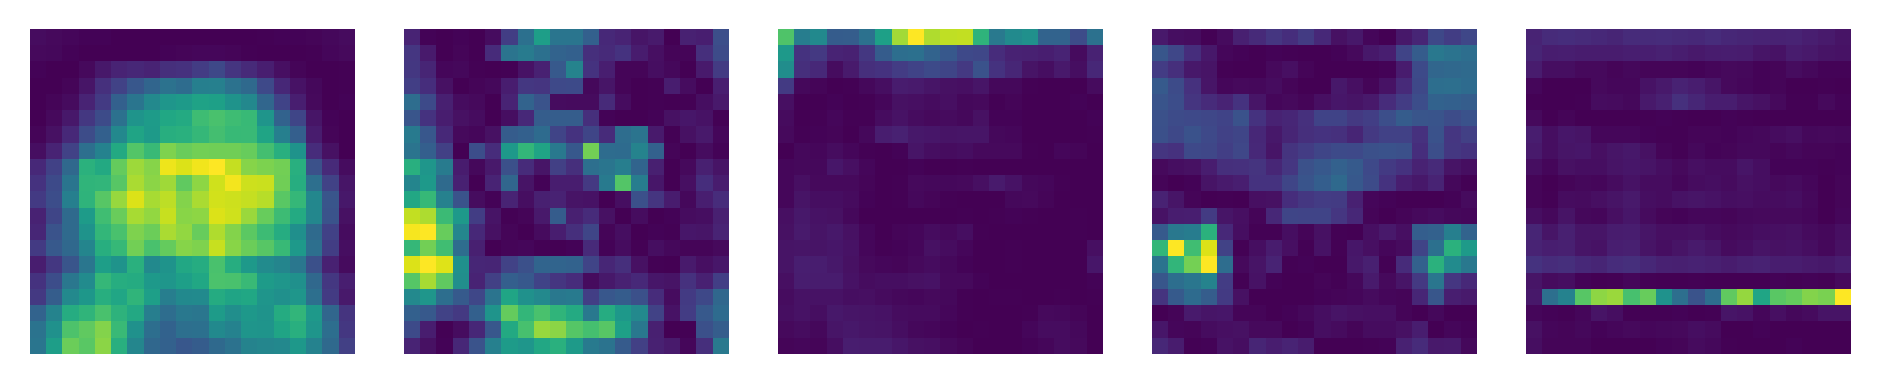

In [204]:
Image(filename=stage_9, width=1000)

# Neck Module Layers 10 - 23

In [151]:
stage_10 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage10_conv_features.png'
stage_11 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage11_Upsample_features.png'
stage_12 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage12_concat_features.png'
stage_13 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage13_C3_features.png'
stage_14 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage14_Conv_features.png'
stage_15 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage15_Upsample_features.png'
stage_16 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage16_Concat_features.png'
stage_17 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage17_C3_features.png'
stage_18 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage18_Conv_features.png'
stage_19 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage19_Concat_features.png'
stage_20 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage20_C3_features.png'
stage_21 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/Stage21_Conv_features.png'
stage_22 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage22_Concat_features.png'
stage_23 = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f/stage23_C3_features.png'

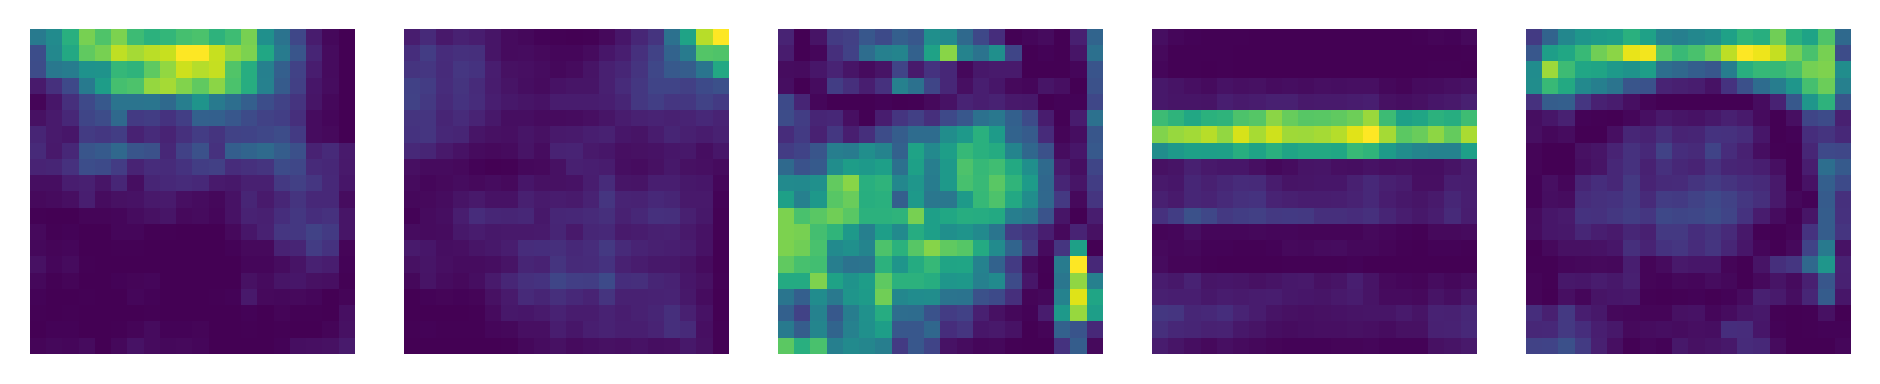

In [209]:
Image(filename=stage_10, width=1000)

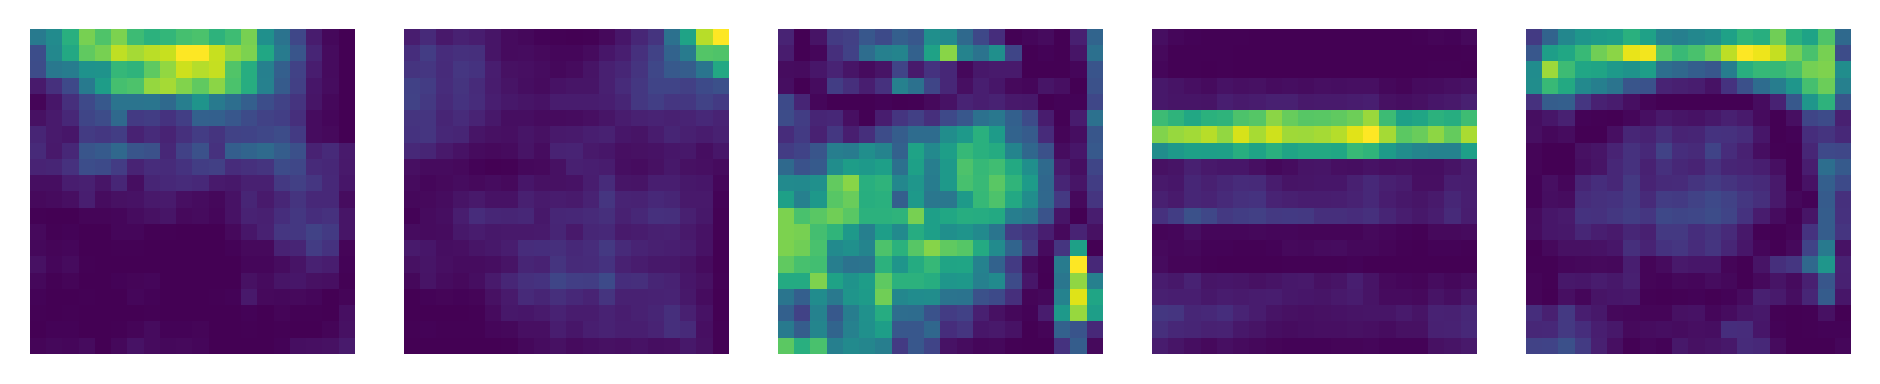

In [211]:
Image(filename=stage_11, width=1000)

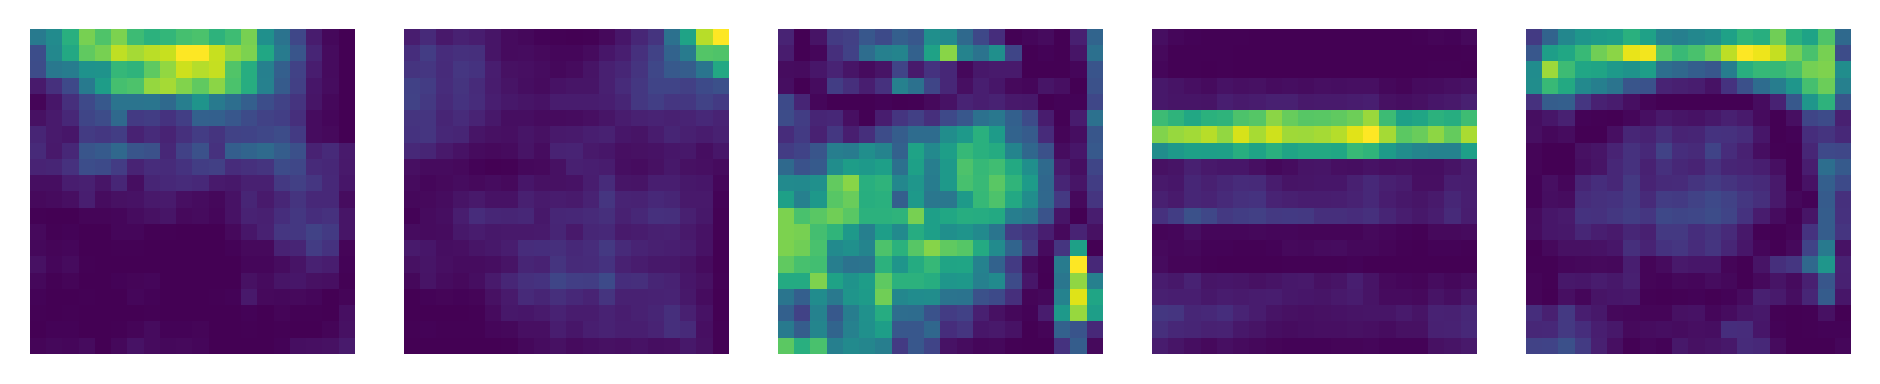

In [212]:
Image(filename=stage_12, width=1000)

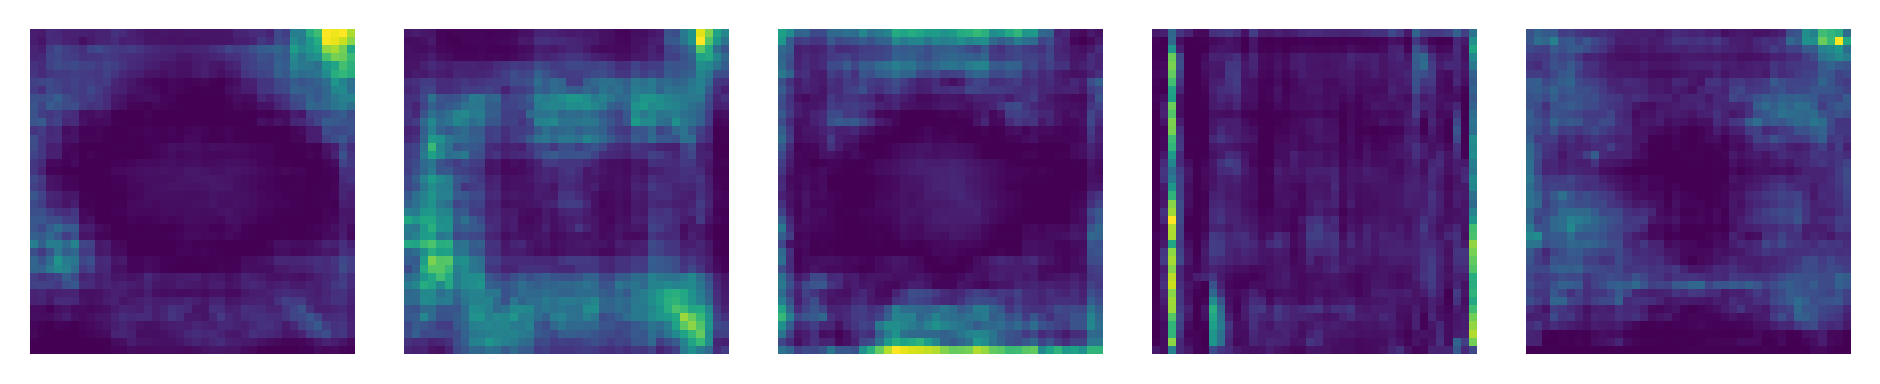

In [213]:
Image(filename=stage_13, width=1000)

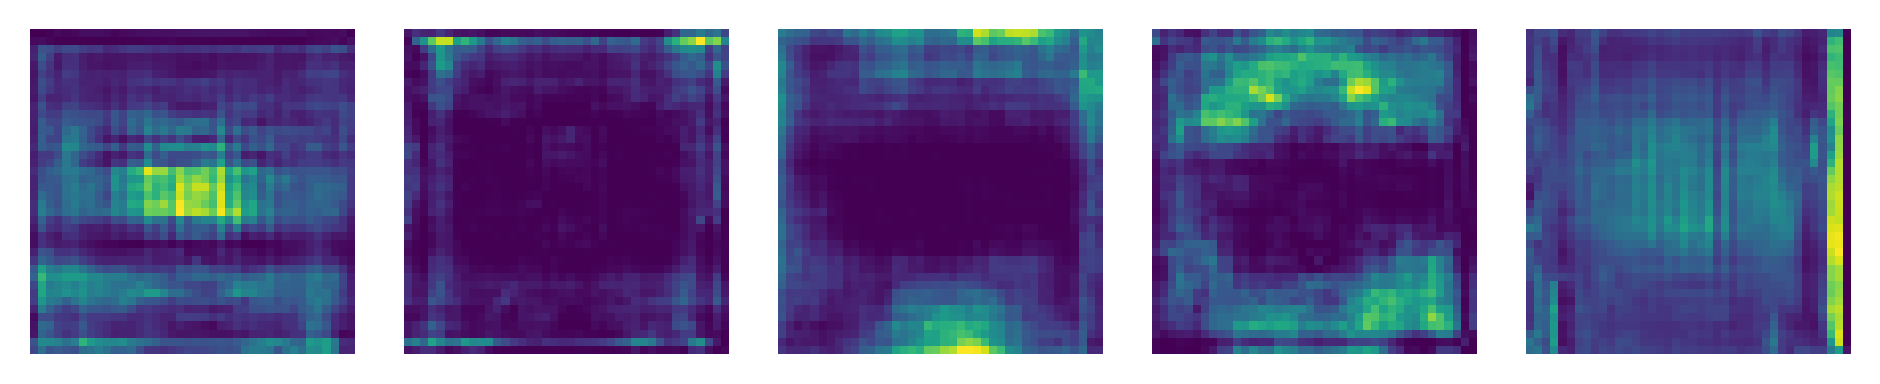

In [214]:
Image(filename=stage_14, width=1000)

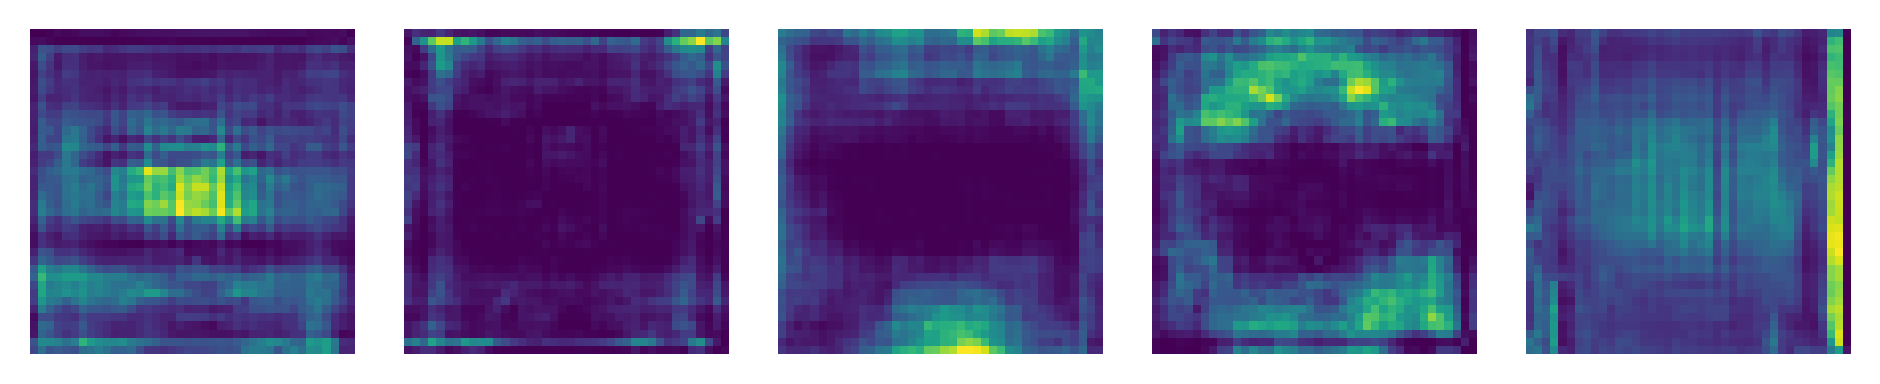

In [215]:
Image(filename=stage_15, width=1000)

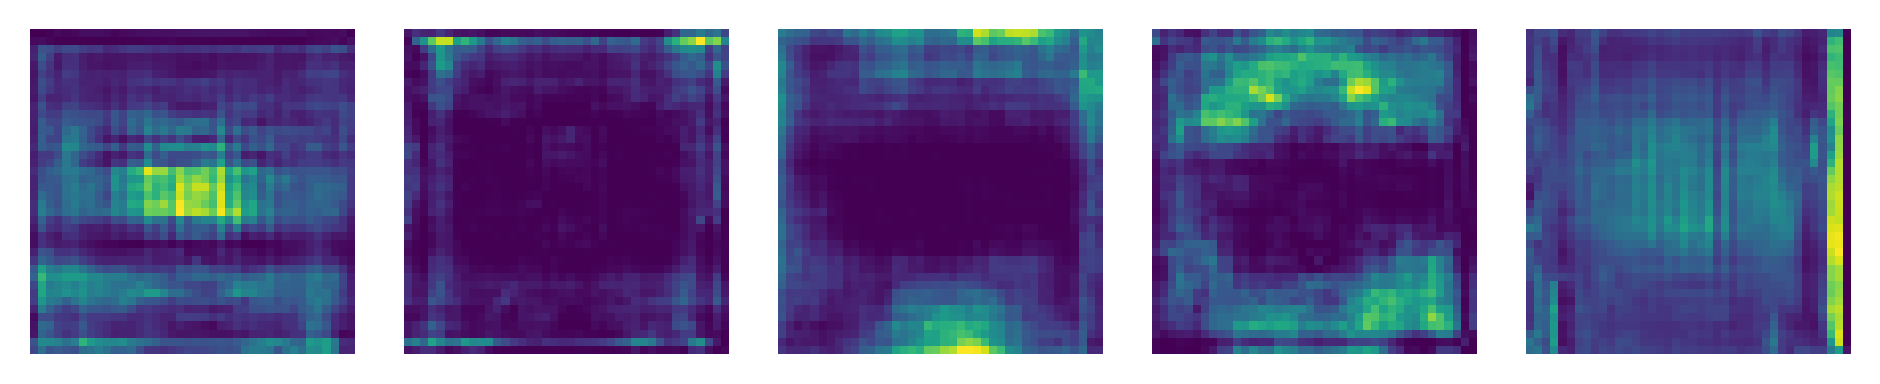

In [216]:
Image(filename=stage_16, width=1000)

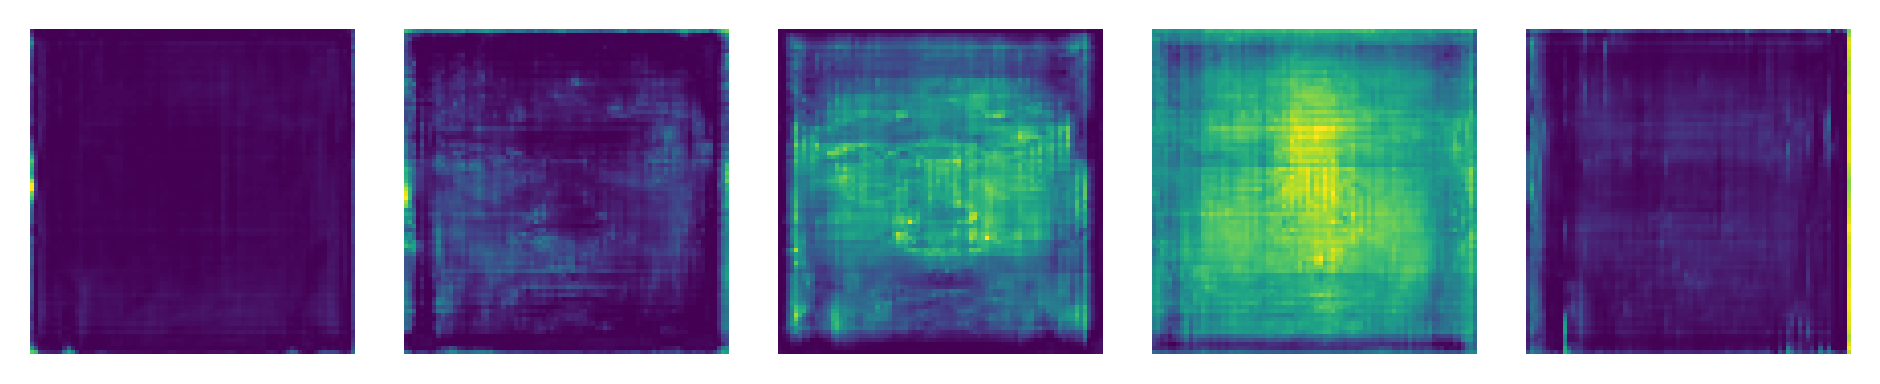

In [217]:
Image(filename=stage_17, width=1000)

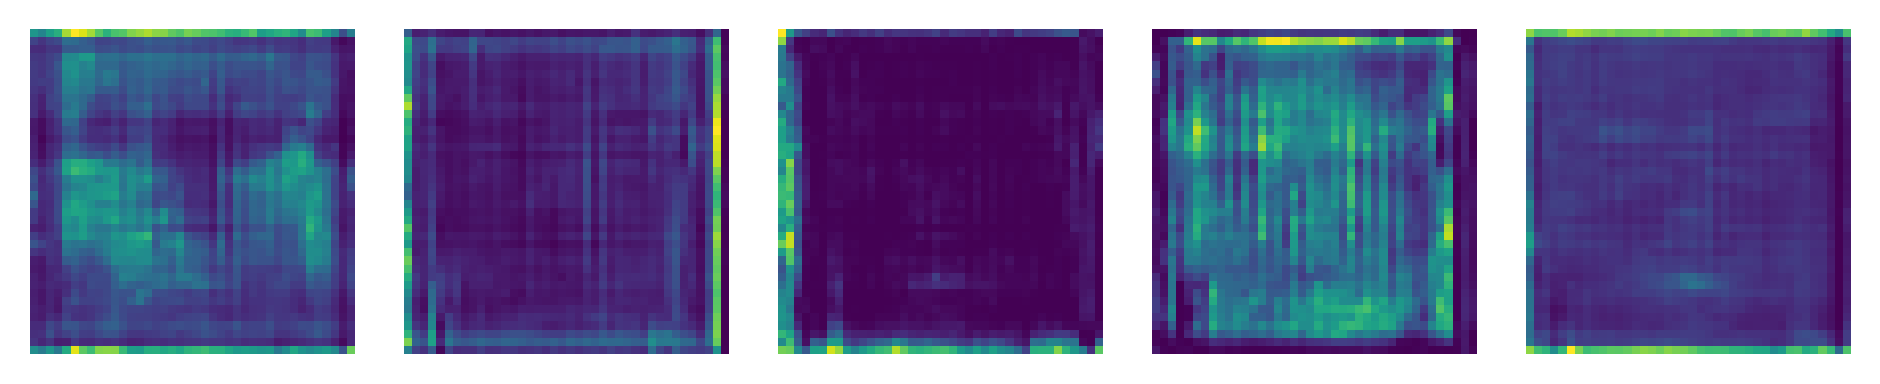

In [218]:
Image(filename=stage_18, width=1000)

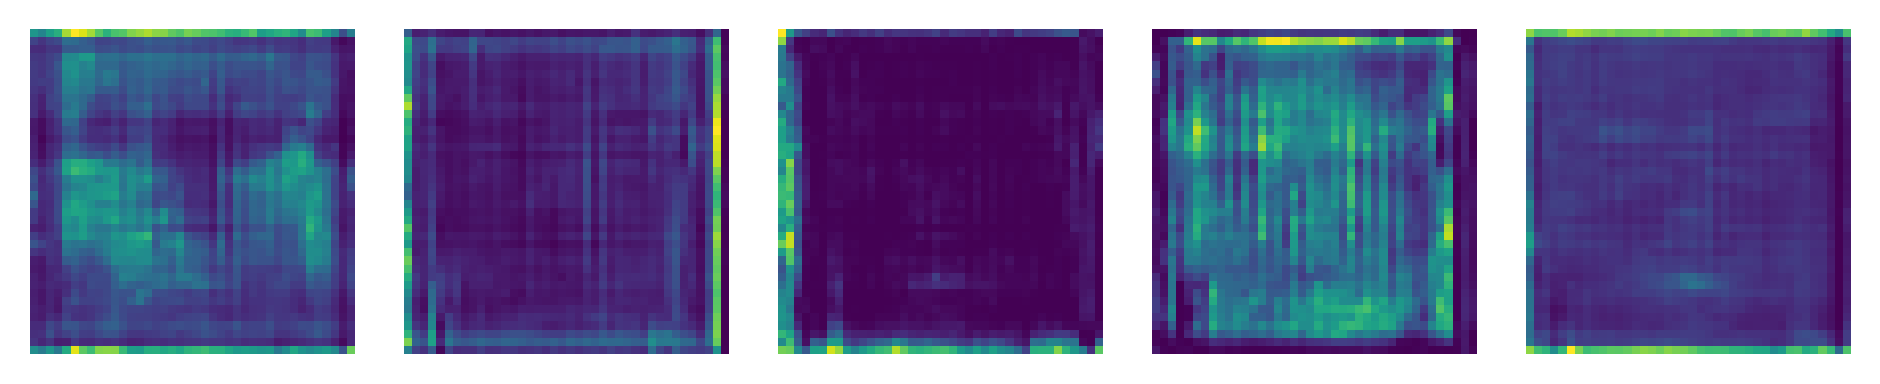

In [219]:
Image(filename=stage_19, width=1000)

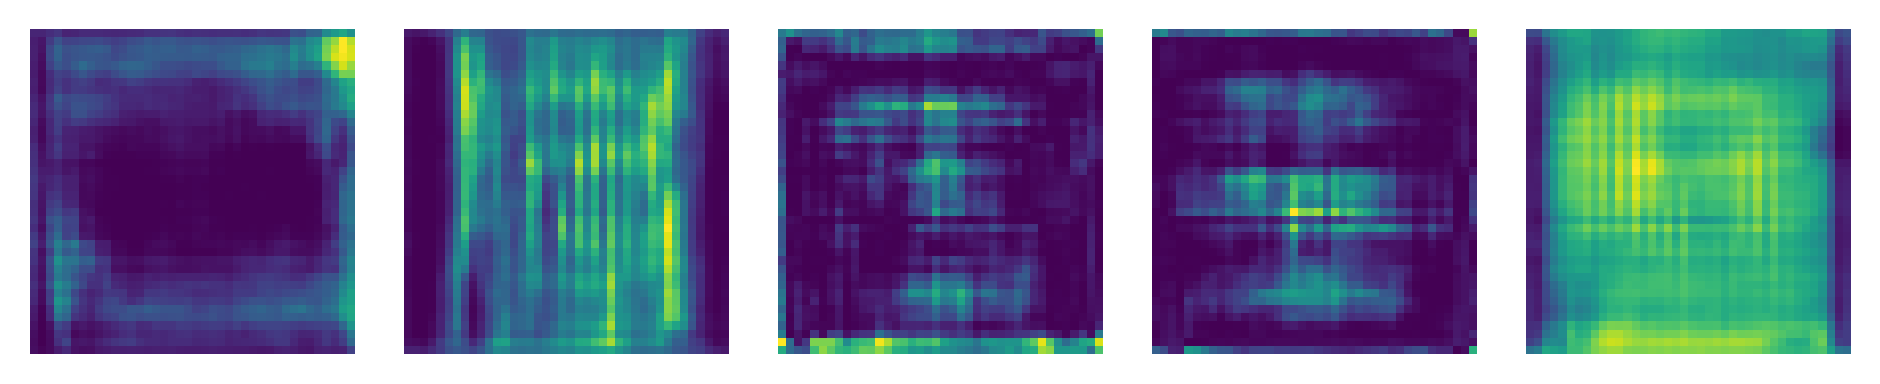

In [220]:
Image(filename=stage_20, width=1000)

# Head Module Output

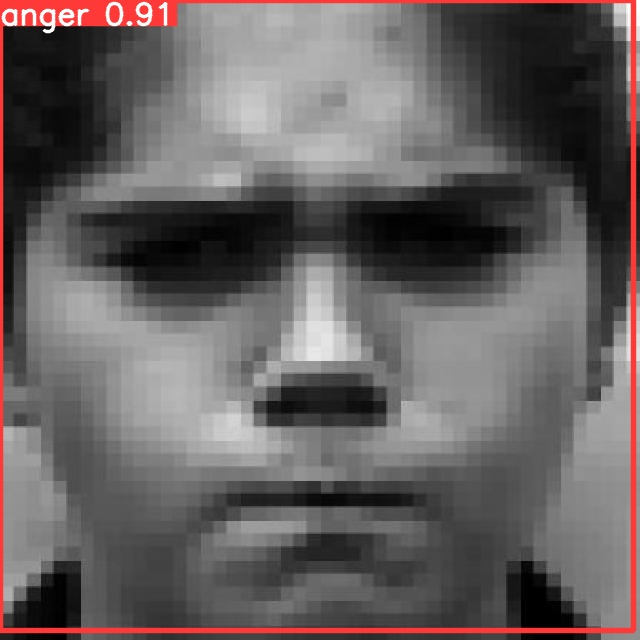

In [221]:
#View the final output from the Head Module
final_output = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/detect/exp251/S011_004_00000021_png_jpg.rf.8a47319360479a5b11f9b8037a560a2f.jpg'
Image(filename=final_output, width=500)

# Testing Dataset

In [5]:
model_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5'

In [222]:
!python {model_path}/detect.py --weights {model_path}/runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.25 --source {test_path} 

detect: weights=['/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/99 /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images/S010_006_00000013_png_jpg.rf.ba7385b6ac78cf89a9290fe115468e

In [223]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [282]:
!python {model_path}/val.py --weights {model_path}/runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.25 --data /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/data.yaml --task test

val: data=/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/data.yaml, weights=['/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/train/yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.25, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/
test: New cache created: /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/test/labels.cache
            

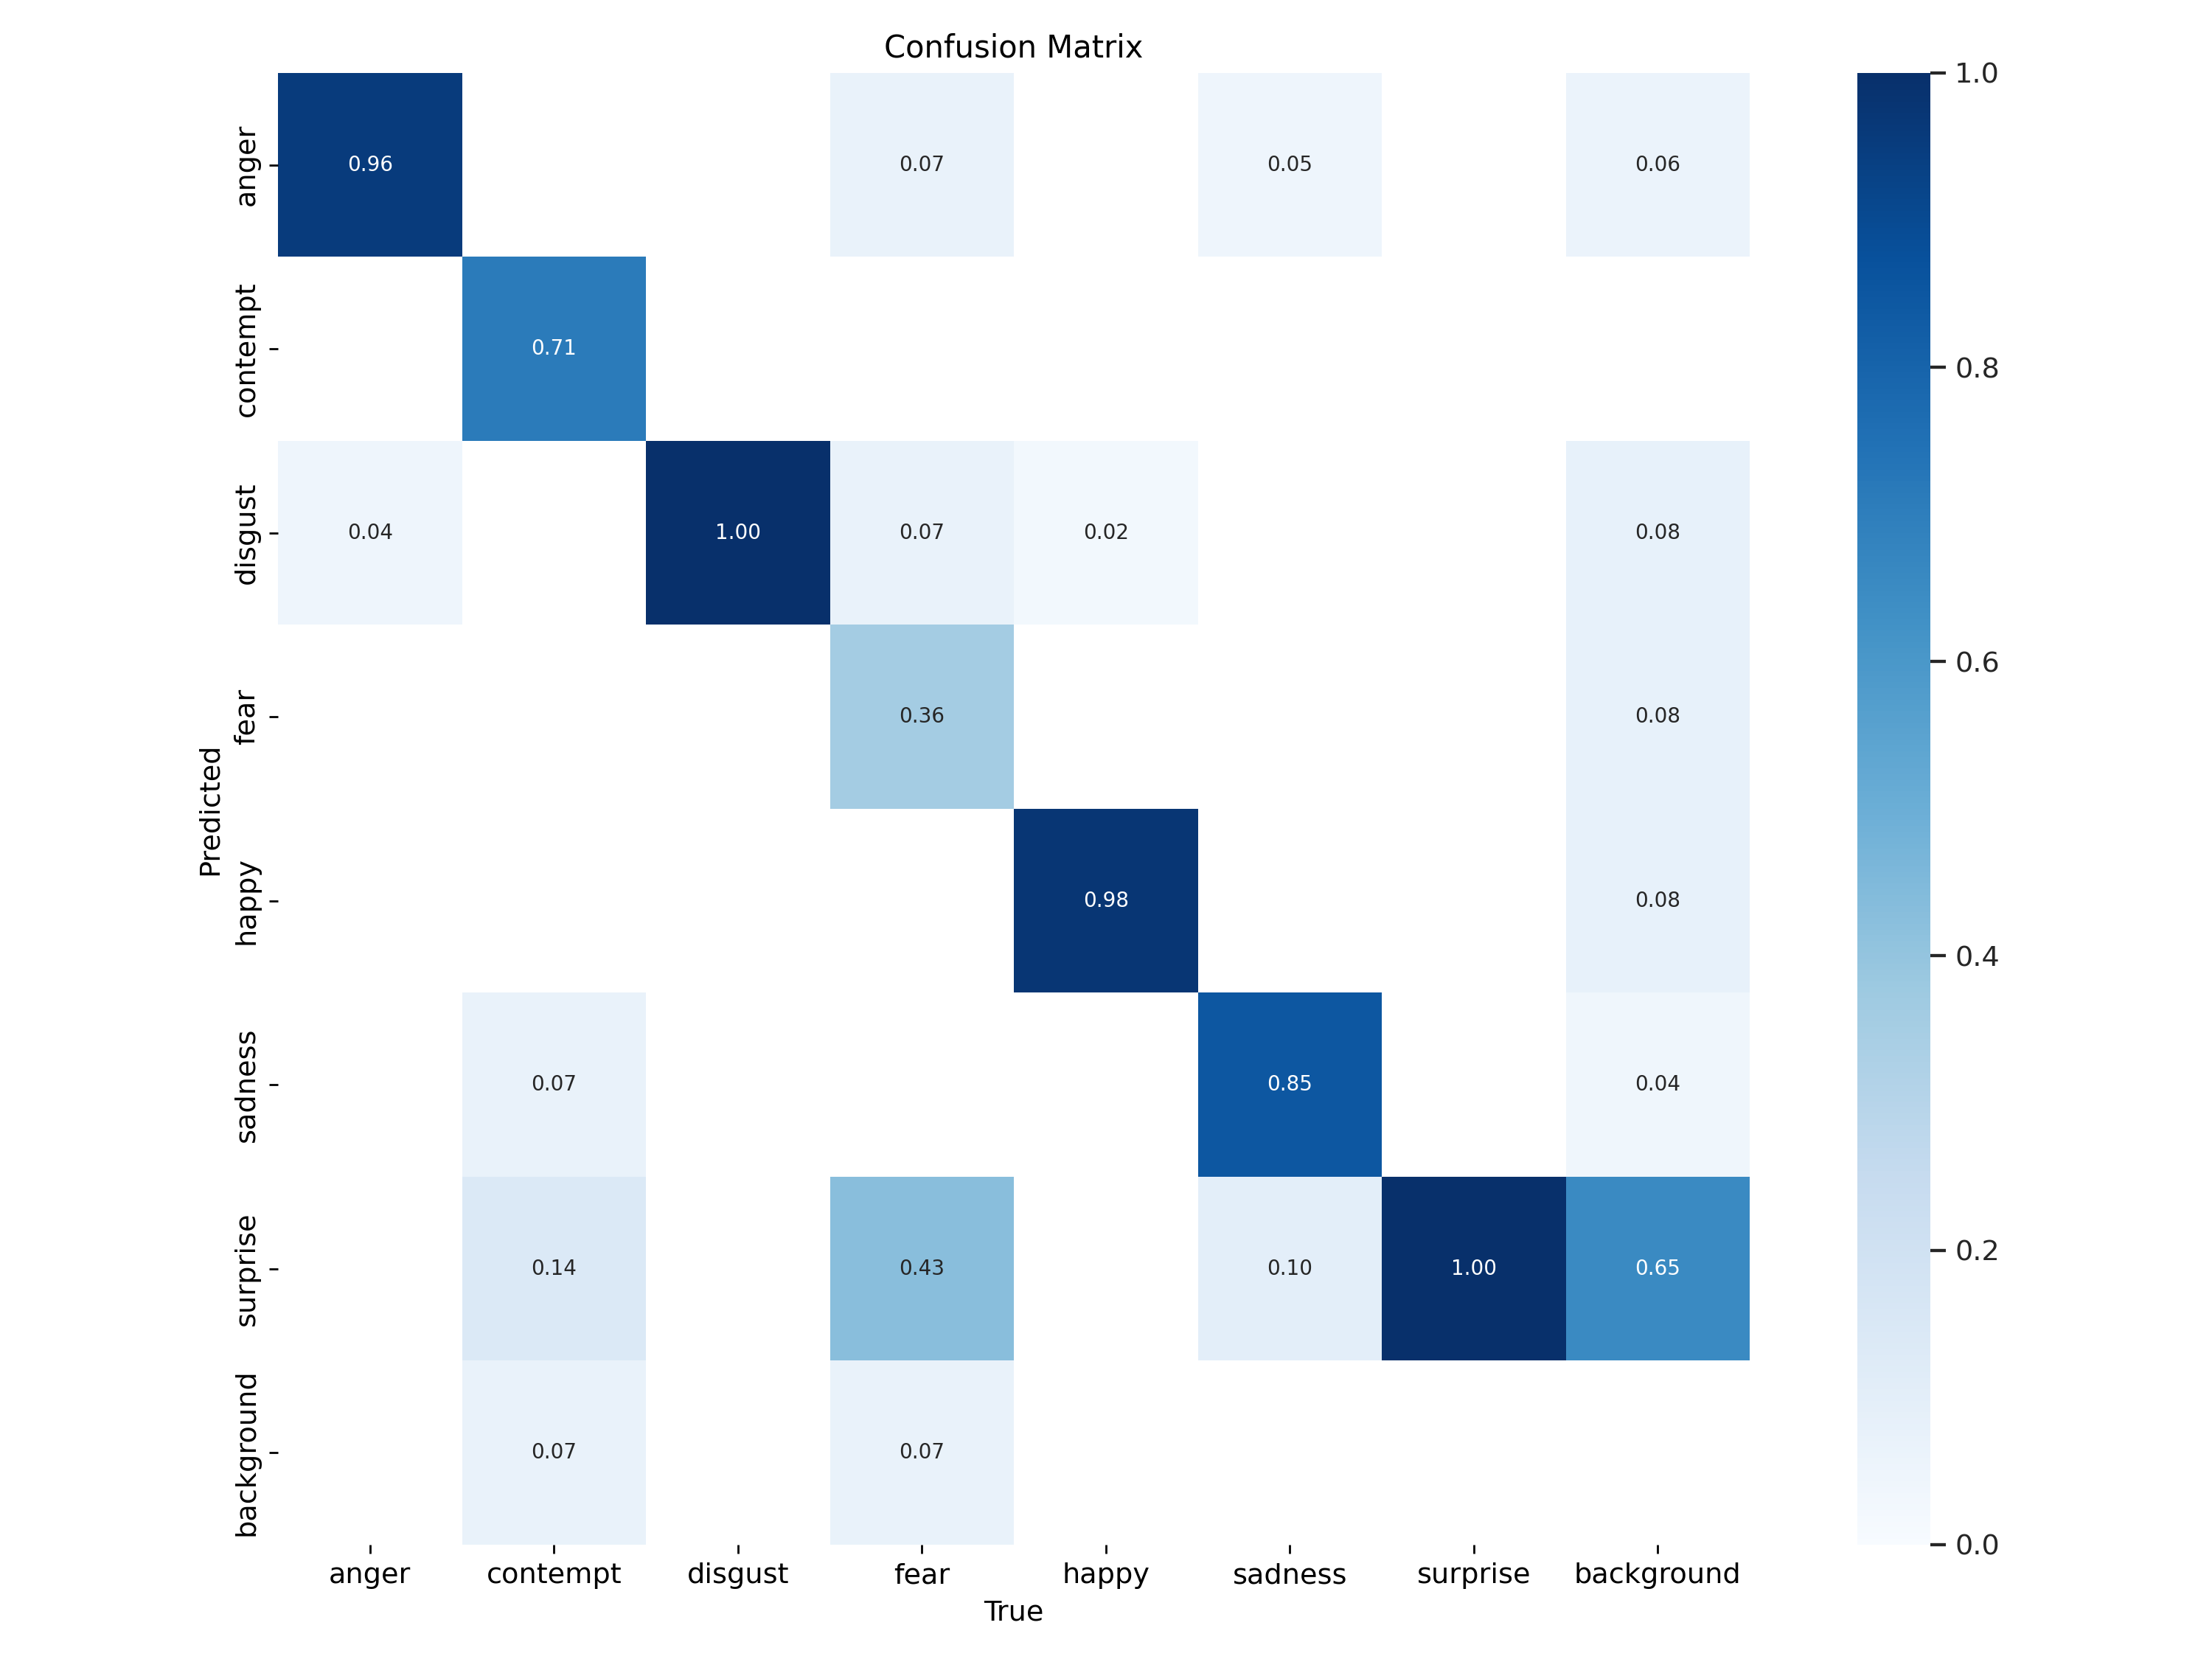

In [6]:
#Display the Confusion Matrix
Image(filename=model_path + '/runs/train/yolov5s_results/confusion_matrix.png', width=1000)

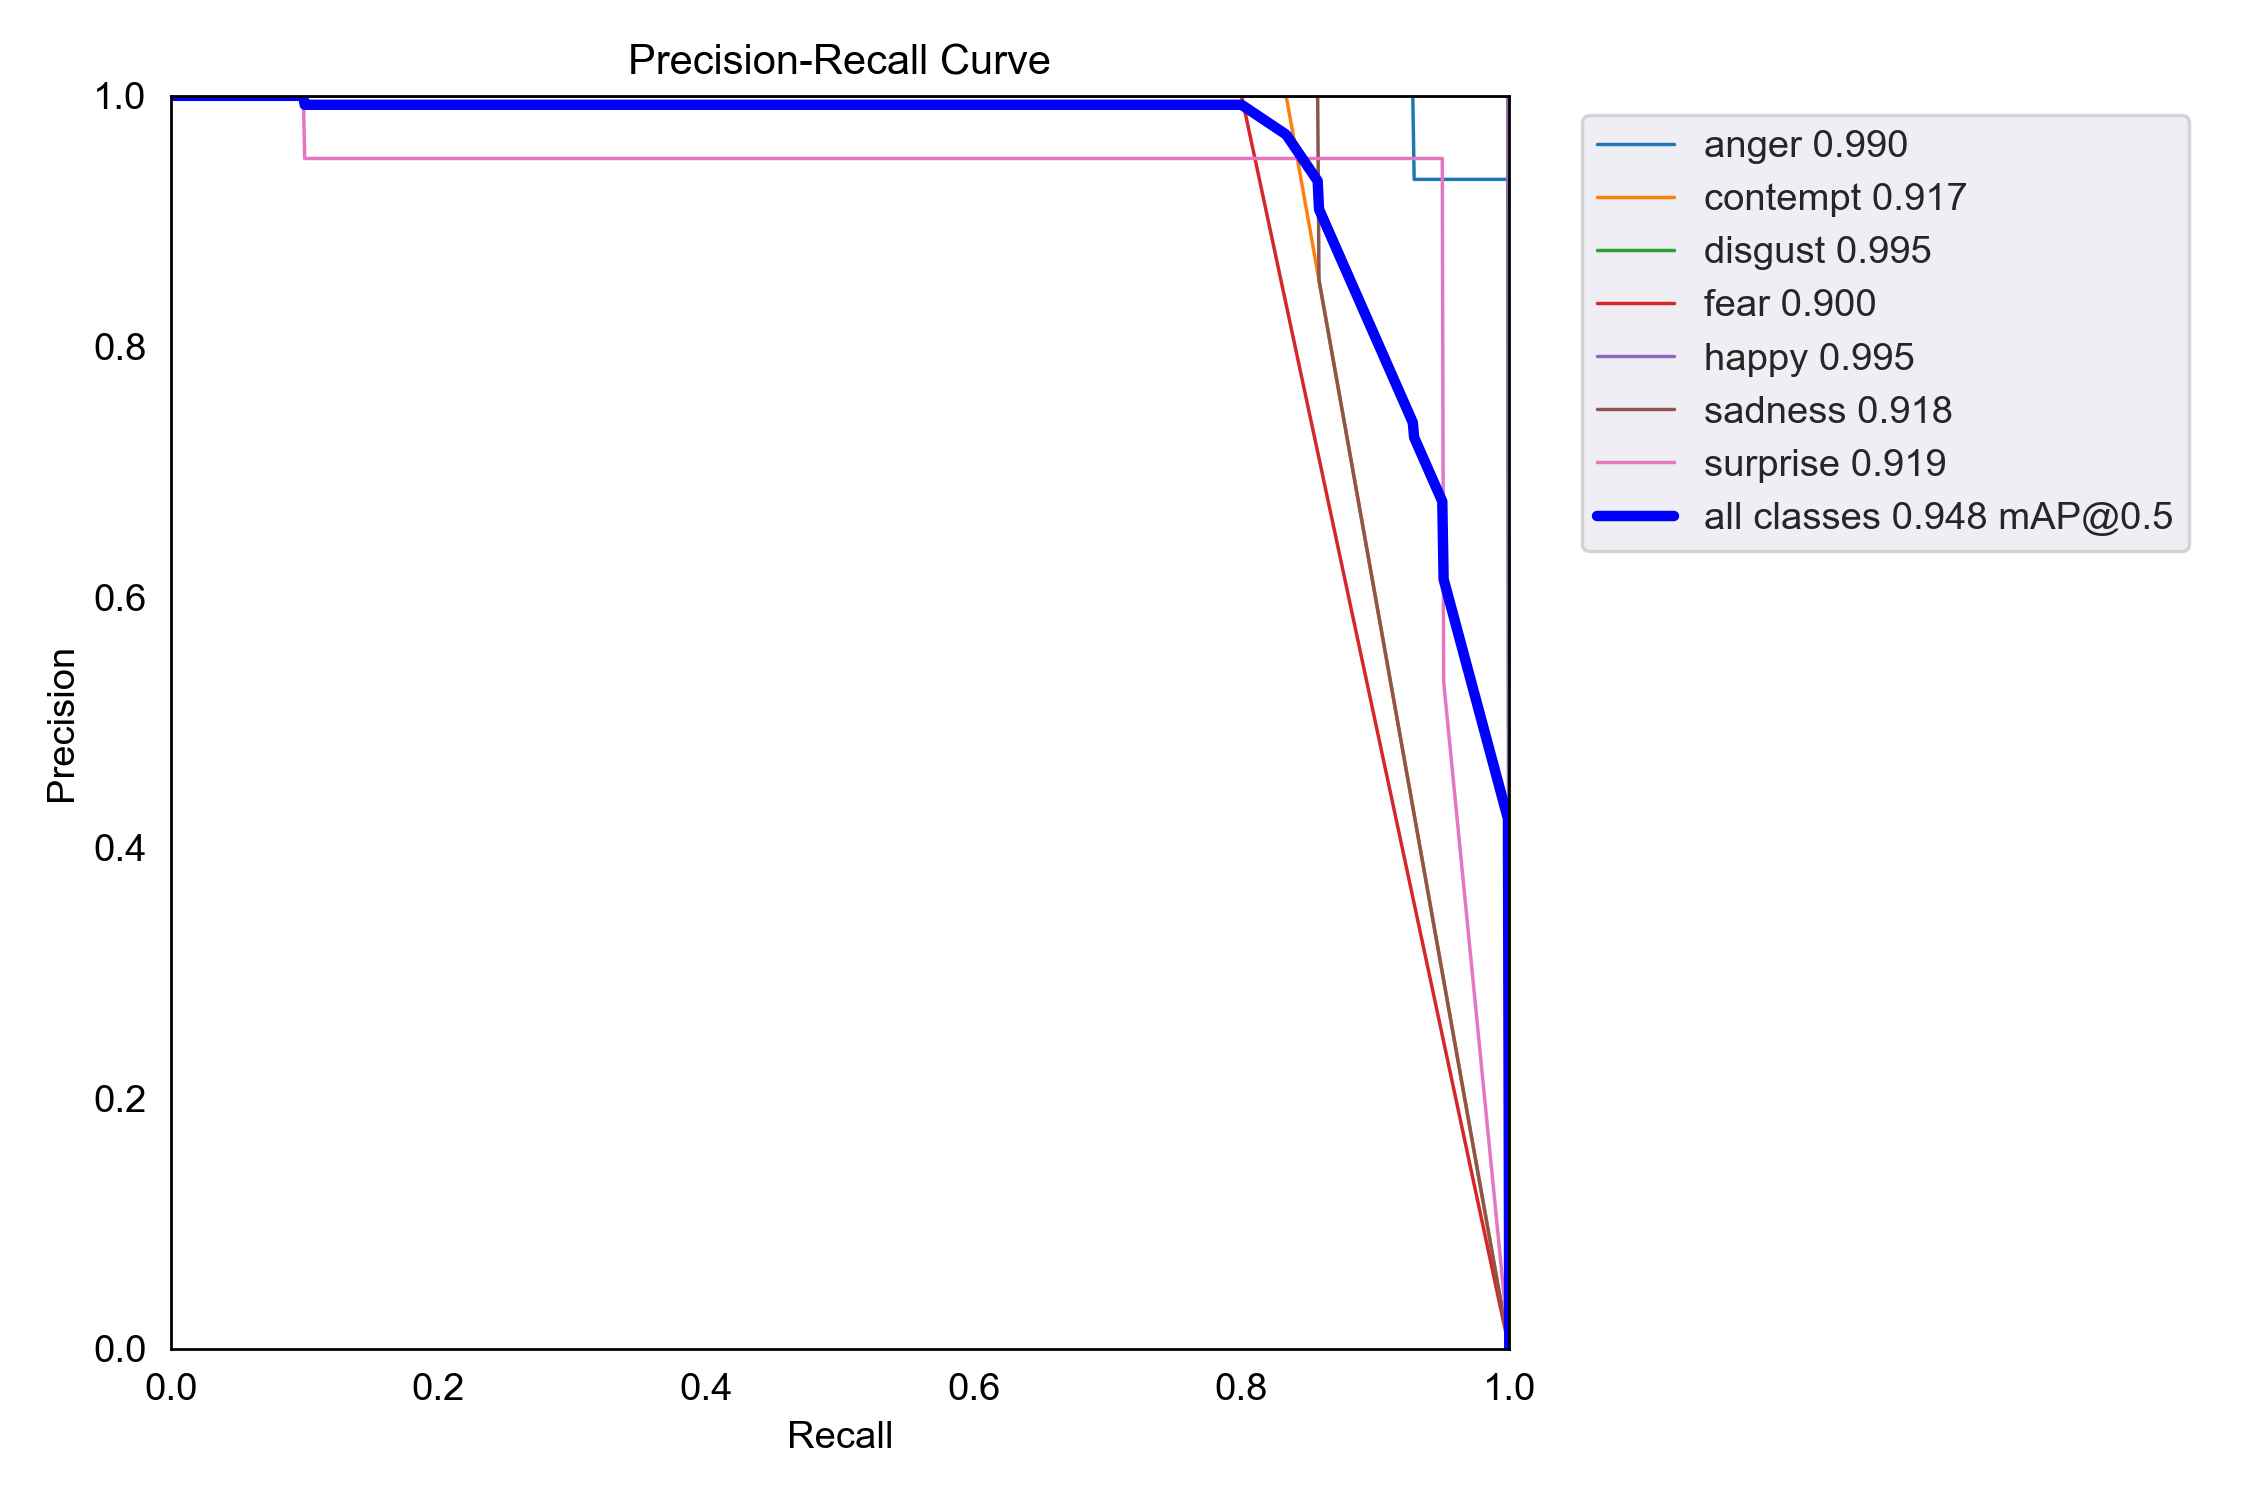

In [9]:
#Display the Precision and Recall Curve
Image(filename=model_path + '/runs/val/exp4/PR_curve.png', width=1000)

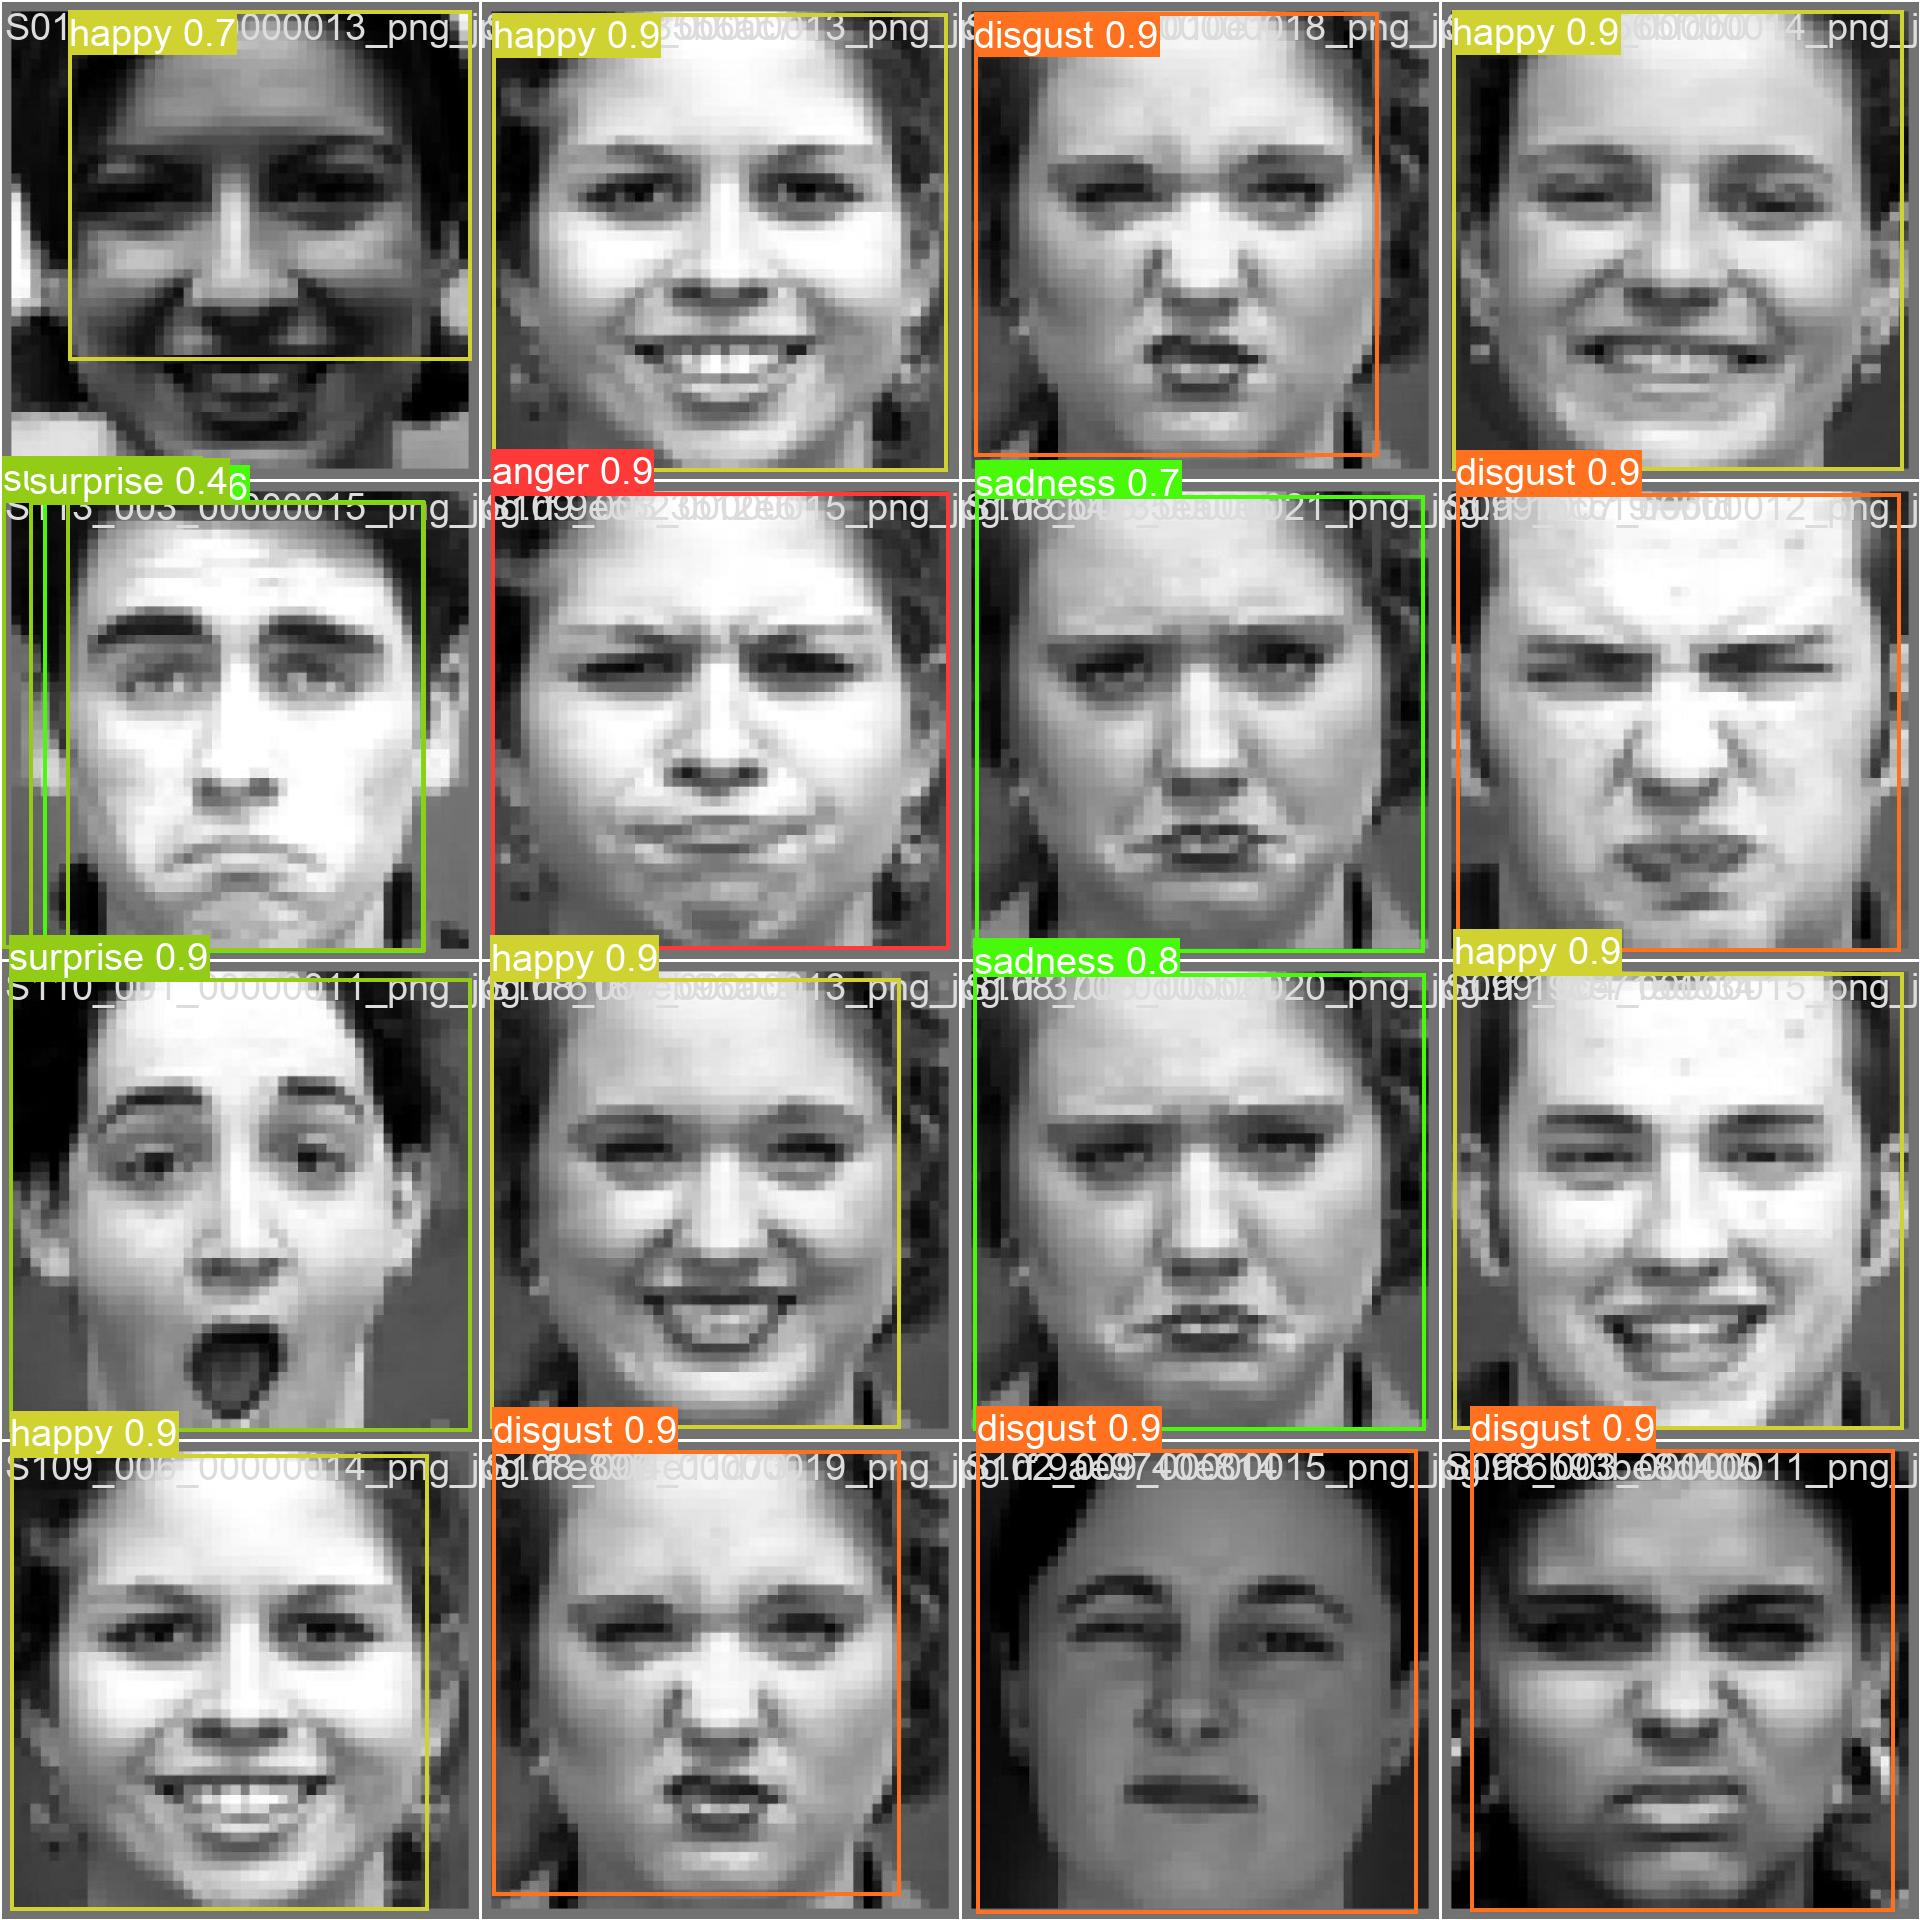

In [10]:
#View val_batch predictions
Image(filename=model_path + '/runs/val/exp4/val_batch0_pred.jpg', width=1000)

In [225]:
!python /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/detect.py --weights /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.5 --source /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images

detect: weights=['/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/99 /Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emociones-1/test/images/S010_006_00000013_png_jpg.rf.ba7385b6ac78cf89a9290fe115468eb

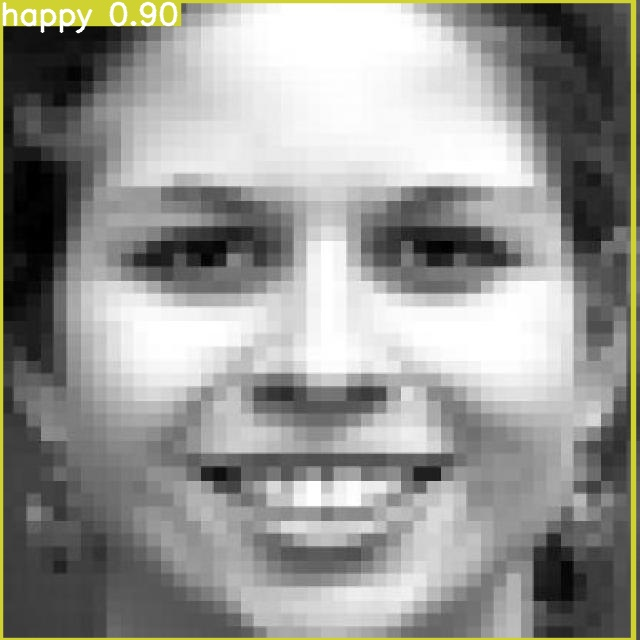

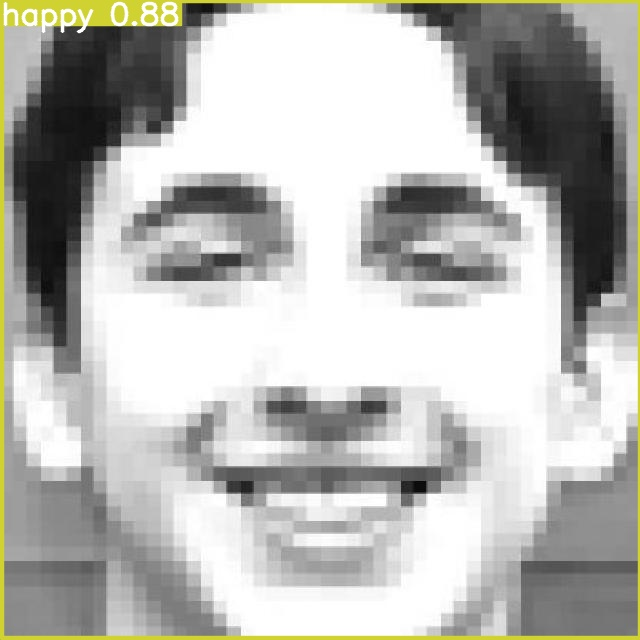

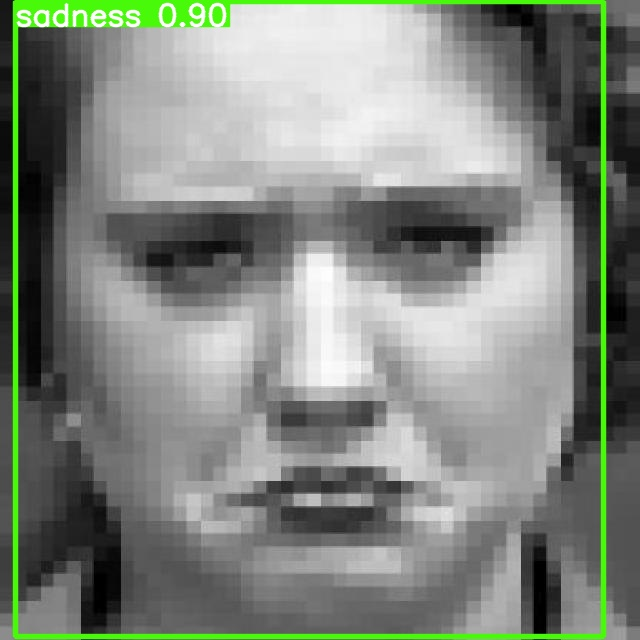

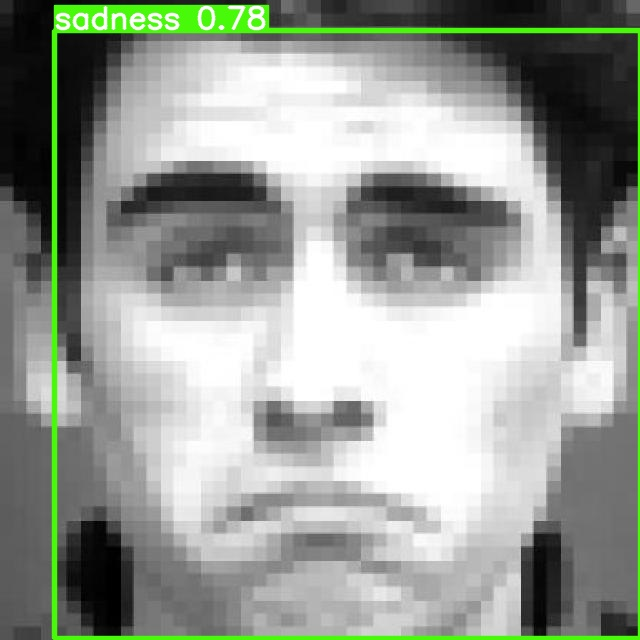

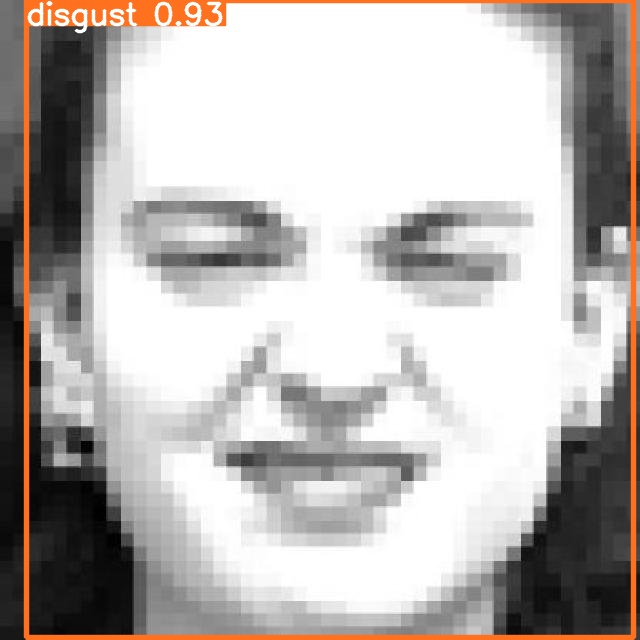

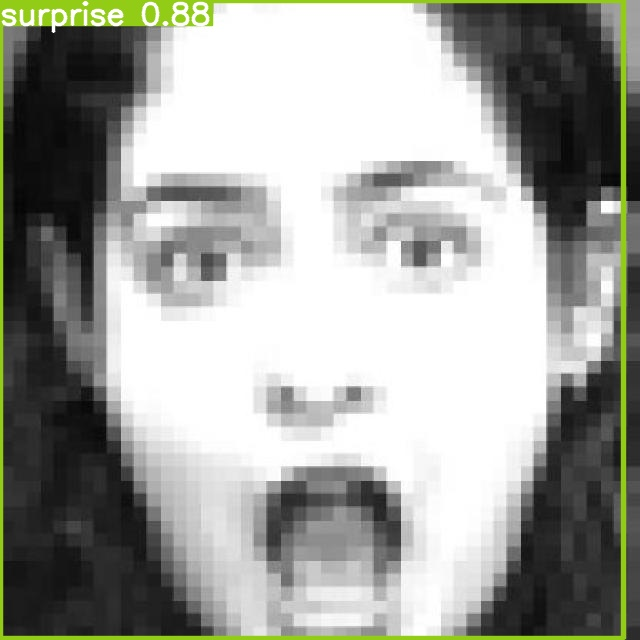

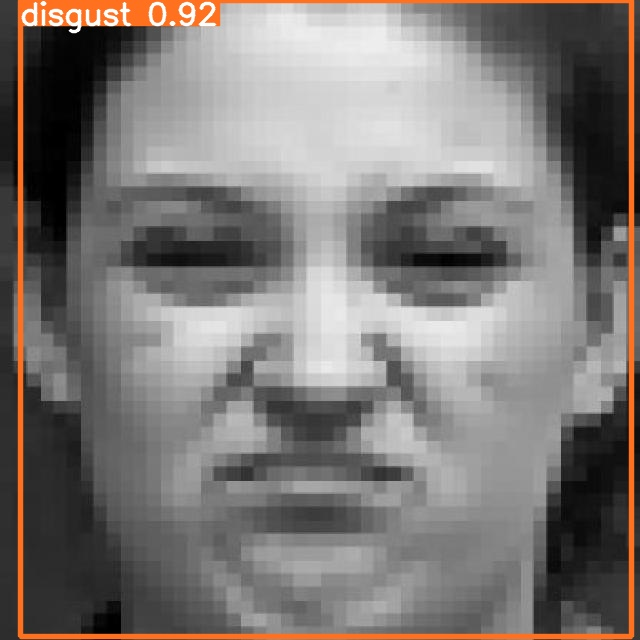

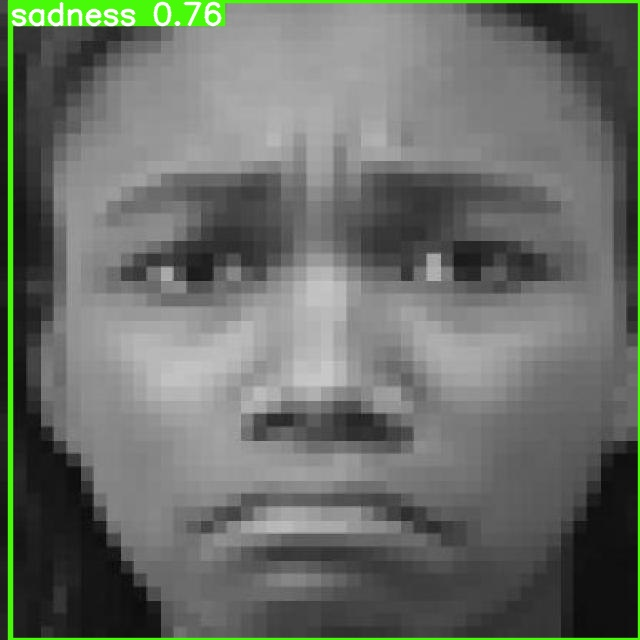

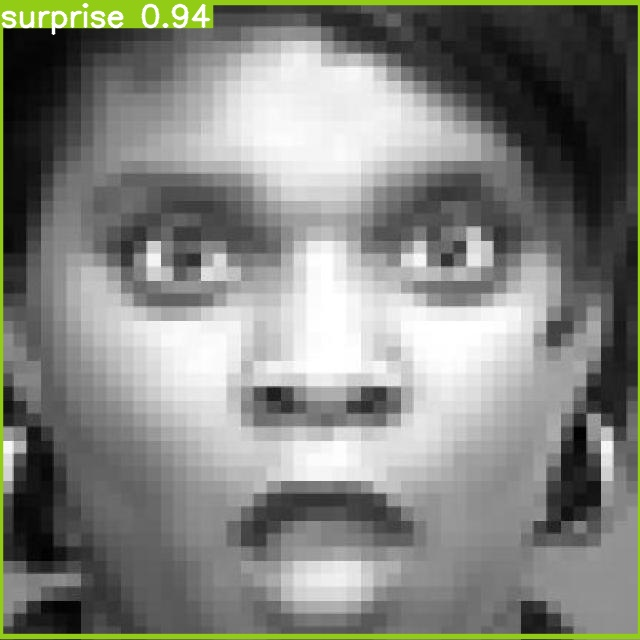

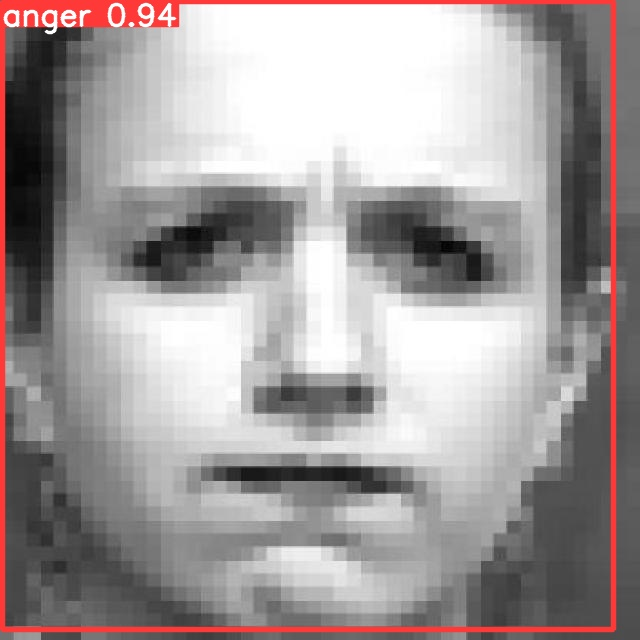

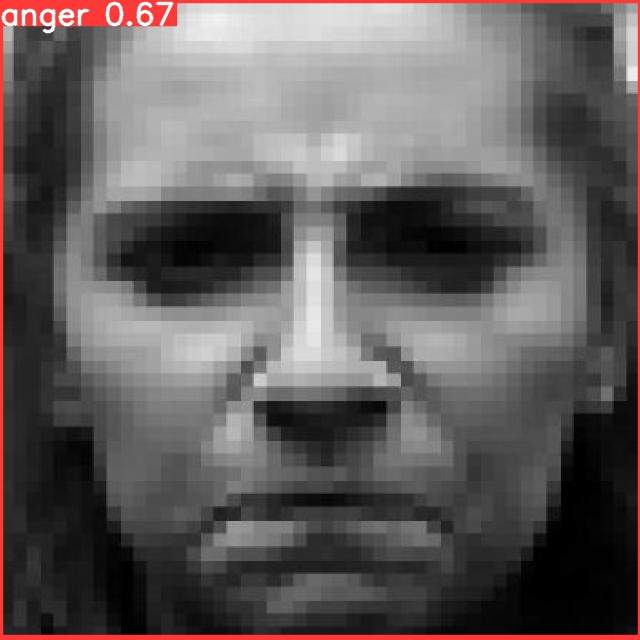

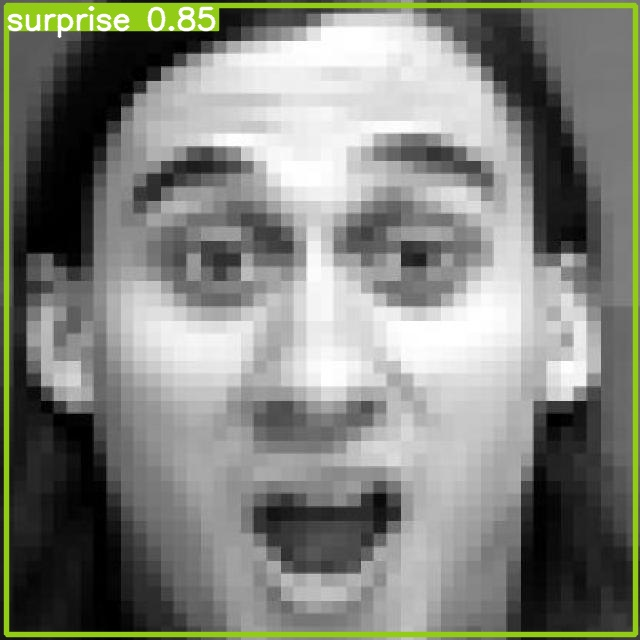

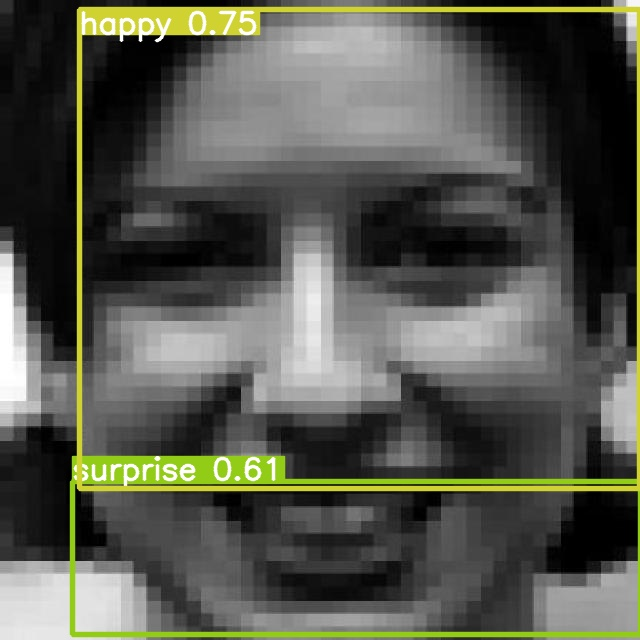

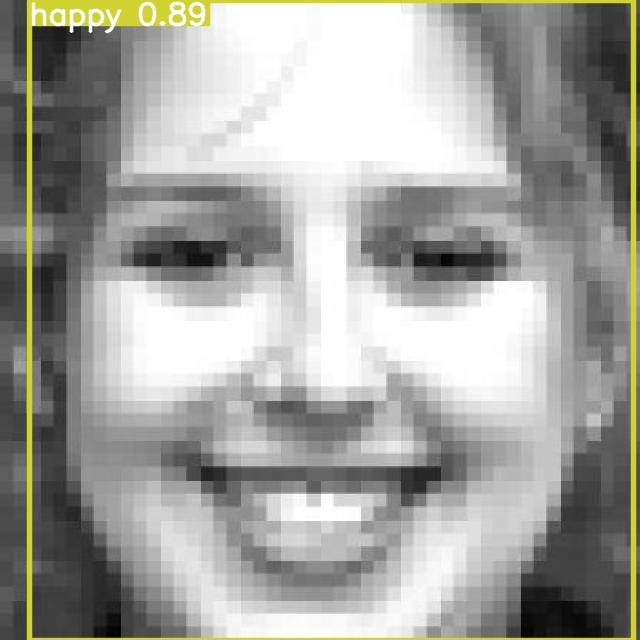

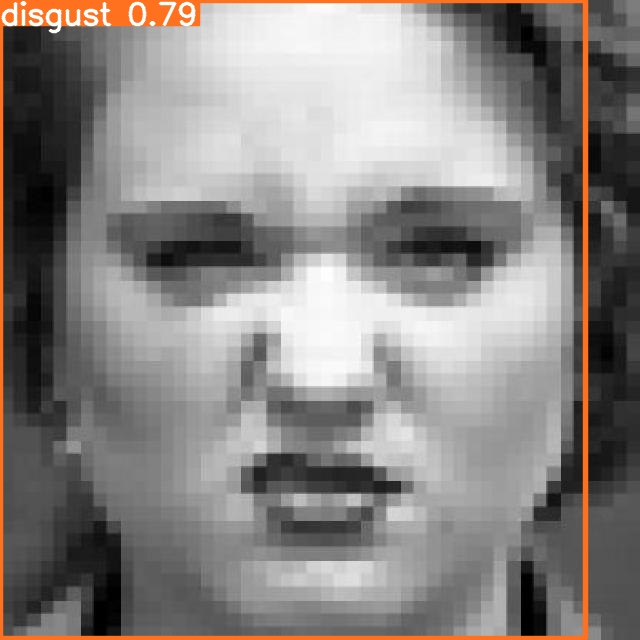

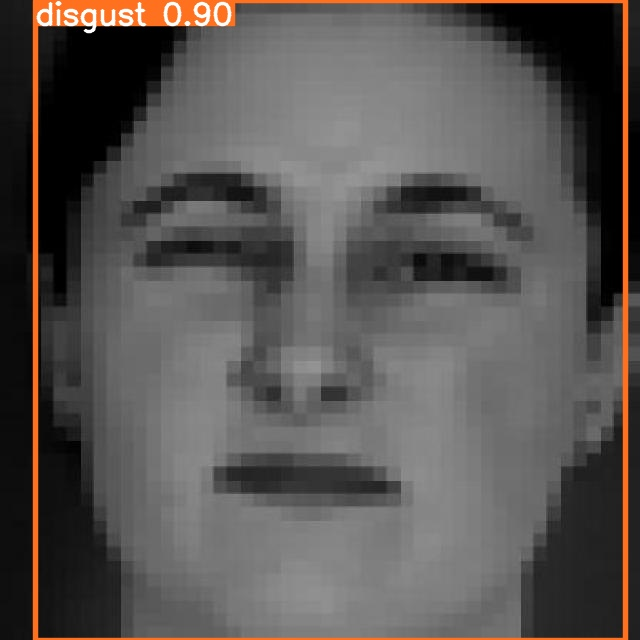

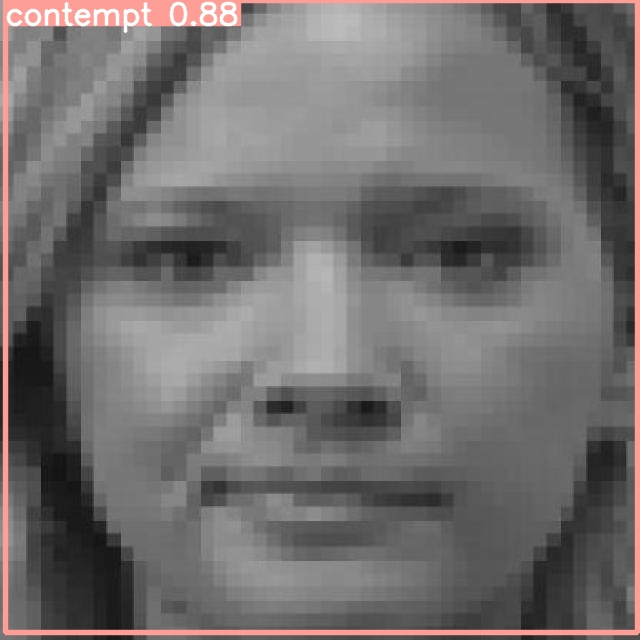

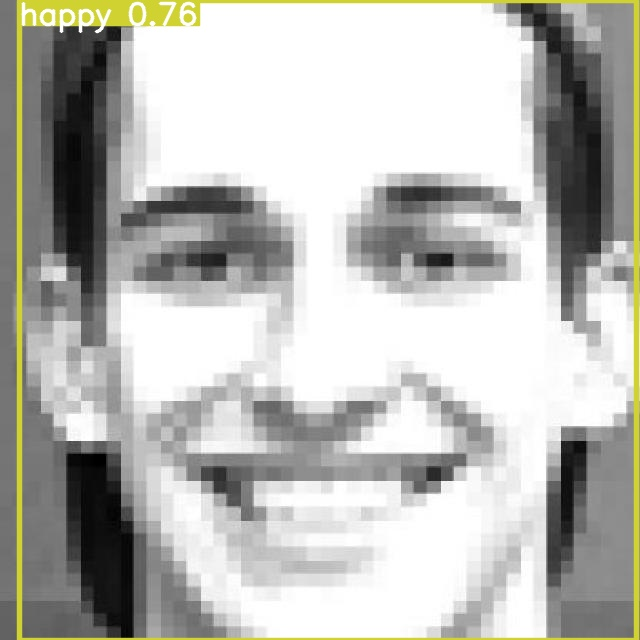

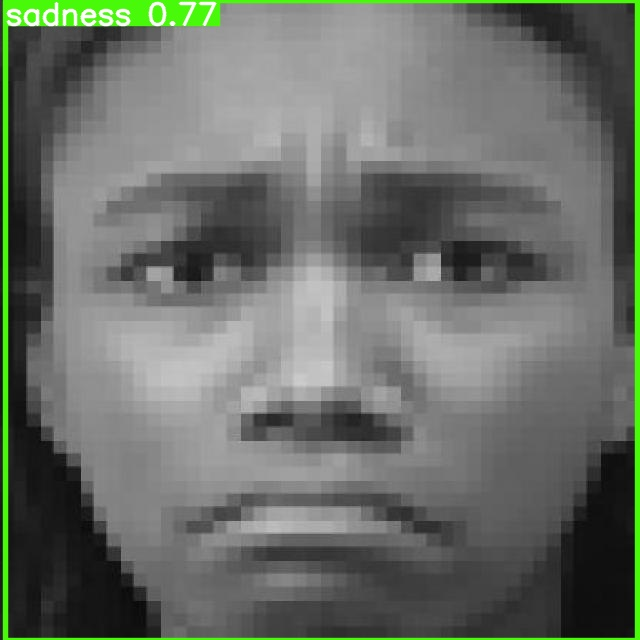

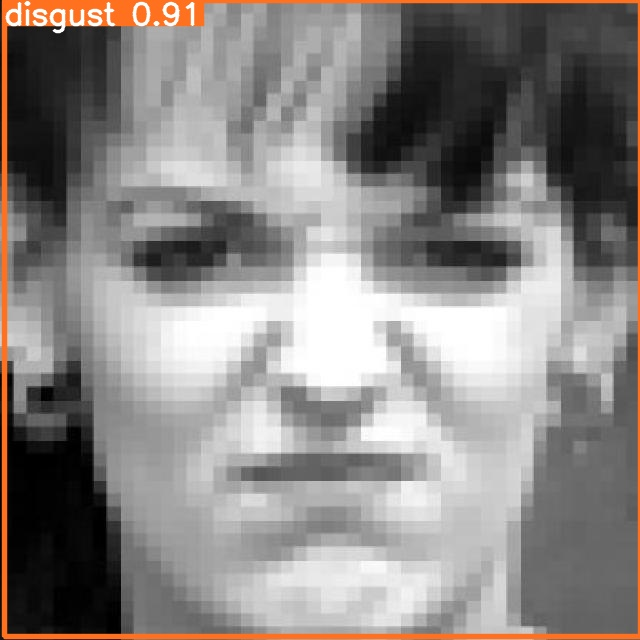

In [249]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(model_path + '/runs/detect/exp254/*.jpg')[0:20]:
    display(Image(filename=imageName, width=200))

# Test your own image with the Model

In [19]:
#Path to the test images 
image_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Emotion_Detection/train/images/test1.png'
model_path = '/Users/abdulbhutta/Desktop/Multimedia_FinalProject/Final_Project/yolov5'

In [20]:
#Initialize the model with the best weights
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path + '/runs/train/yolov5s_results/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/abdulbhutta/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-254-gba63208 Python-3.8.16 torch-2.1.1 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [21]:
#Run the model on the test image 
results = model(image_path)

#Display the results
results.print()

image 1/1: 424x384 1 surprise
Speed: 20.5ms pre-process, 495.8ms inference, 2.7ms NMS per image at shape (1, 3, 640, 608)


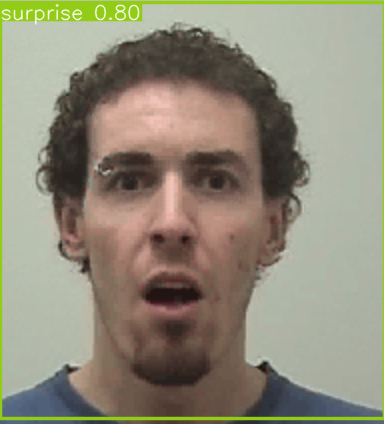

In [22]:
#display the image as size 300
results.show()

In [ ]:
#The code below is for real time detection using the webcam
#Use own your own as it is not optimized or may cause damage to your computer!!! 
#uncomment the code below!

#import cv2 
#import numpy as np
#import time

#Real Time Detection of Emotions using YOLOv5
#load custom model
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/abdulbhutta/Desktop/Multimedia_FinalProject/yolov5/runs/train/yolov5s_results/weights/best.pt', force_reload=True)

#camera = cv2.VideoCapture(0)
#while True:
#    # grab a frame every 1 seconds
#    time.sleep(1)
#    ret, frame = camera.read()
#    results = model(frame)
#    cv2.imshow('YOLO', np.squeeze(results.render()))
#    if cv2.waitKey(20) & 0xFF == ord('q'):
#      break  # q to quit
#        # release resources and stop opencv processing 
#camera.release()
#cv2.destroyAllWindows()
#for i in range(2):
#    cv2.waitKey(1)